In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from seaborn import heatmap
from matplotlib.colors import LogNorm

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150
plt.rcParams["legend.loc"] = 'best'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_no_w = "/eos/user/p/psimkina/evaluation/jet_model/run_45/"
data_genpt = "/eos/user/p/psimkina/evaluation/jet_model/genpt_reweighted/"
data_et = "/eos/user/p/psimkina/evaluation/jet_model/gamma_ele_reweighted_jet_high/"
data_genpt_et = "/eos/user/p/psimkina/evaluation/jet_model/genpt_Et_weights/run_01/"

In [3]:
no_w_df_gamma = pd.read_csv(data_no_w+"validation_dataset_v11_gamma_newds.csv", sep=";")[:50000]
no_w_df_ele = pd.read_csv(data_no_w+"validation_dataset_v11_ele_newds.csv", sep=";")[:50000]
no_w_df_jet = pd.read_csv(data_no_w+"validation_dataset_v11_jetmatch_newds.csv", sep=";")[:50000]

In [4]:
genpt_df_gamma = pd.read_csv(data_genpt+"validation_dataset_v11_gamma_newds.csv", sep=";")[:50000]
genpt_df_ele = pd.read_csv(data_genpt+"validation_dataset_v11_ele_newds.csv", sep=";")[:50000]
genpt_df_jet = pd.read_csv(data_genpt+"validation_dataset_v11_jetmatch_newds.csv", sep=";")[:50000]

In [5]:
et_df_gamma = pd.read_csv(data_et+"validation_dataset_v11_gamma_newds.csv", sep=";")[:50000]
et_df_ele = pd.read_csv(data_et+"validation_dataset_v11_ele_newds.csv", sep=";")[:50000]
et_df_jet = pd.read_csv(data_et+"validation_dataset_v11_jetmatch_newds.csv", sep=";")[:50000]

In [6]:
genpt_et_df_gamma = pd.read_csv(data_genpt_et+"validation_dataset_v11_gamma_newds.csv", sep=";")[:50000]
genpt_et_df_ele = pd.read_csv(data_genpt_et+"validation_dataset_v11_ele_newds.csv", sep=";")[:50000]
genpt_et_df_jet = pd.read_csv(data_genpt_et+"validation_dataset_v11_jetmatch_newds.csv", sep=";")[:50000]

In [13]:
def calc_appear(df):
    max_prob = df[['w_gamma', 'w_ele', 'w_jet']].idxmax(axis=1)
    return max_prob.value_counts()/len(df)

In [51]:
def confusion_matrix(df_gamma, df_ele, df_jet, ax=None): 
    gamma_matr = calc_appear(df_gamma)
    ele_matr = calc_appear(df_ele)
    jet_matr = calc_appear(df_jet)
    
    confusion_matrix = np.empty((3,3))

    confusion_matrix[0,0] = gamma_matr['w_gamma']
    confusion_matrix[1,1] = ele_matr['w_ele']
    confusion_matrix[2,2] = jet_matr['w_jet']

    confusion_matrix[0,1] = gamma_matr['w_ele']
    confusion_matrix[0,2] = gamma_matr['w_jet']

    confusion_matrix[1,0] = ele_matr['w_gamma']
    confusion_matrix[1,2] = ele_matr['w_jet']

    confusion_matrix[2,0] = jet_matr['w_gamma']
    confusion_matrix[2,1] = jet_matr['w_ele']
    
    heatmap(confusion_matrix, annot=True, yticklabels=['gamma','ele','jet'],
        xticklabels=['gamma','ele','jet'], fmt='.3f', ax=ax)
    #plt.title('Fraction of predicted N of clusters \n to true N (%)')
    ax.set_ylabel('true')
    ax.set_xlabel('predicted')
    
    return confusion_matrix

In [52]:
energies = [[0,5], [5,10], [10,20], [20,40], [40,60], [60,80], [80,100]]

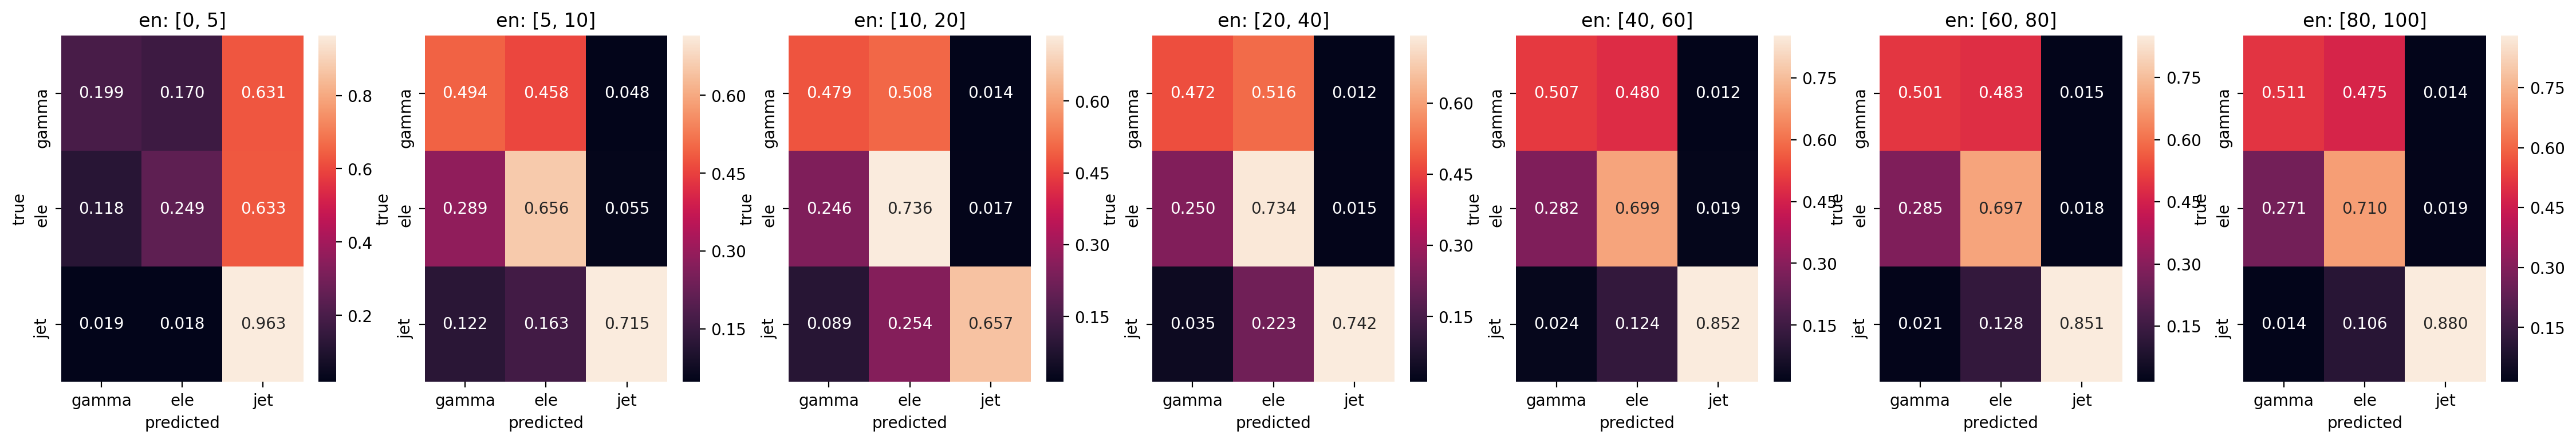

In [54]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)

no_w_conf_matrix = []
#fig.suptitle("gamma vs. jet (genpt_weights)")
for i, energy in enumerate(energies): 
    conf_m = confusion_matrix(no_w_df_gamma.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     no_w_df_ele.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     no_w_df_jet.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     ax=axis[i])
    
    no_w_conf_matrix.append(conf_m)
    
    axis[i].set_title("en: {}".format(energy))

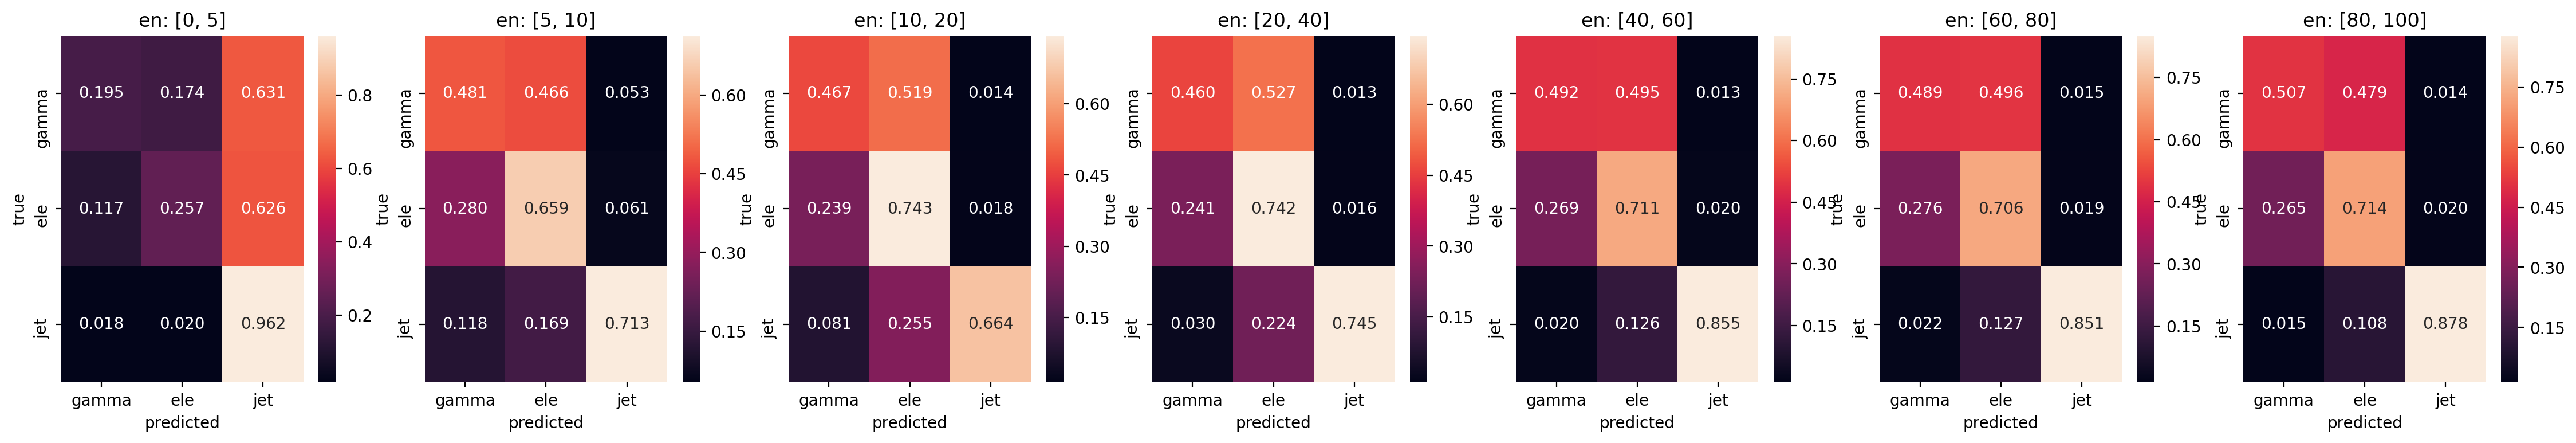

In [31]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
#fig.suptitle("gamma vs. jet (genpt_weights)")
for i, energy in enumerate(energies): 
    confusion_matrix(genpt_df_gamma.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     genpt_df_ele.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     genpt_df_jet.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     ax=axis[i])
    axis[i].set_title("en: {}".format(energy))

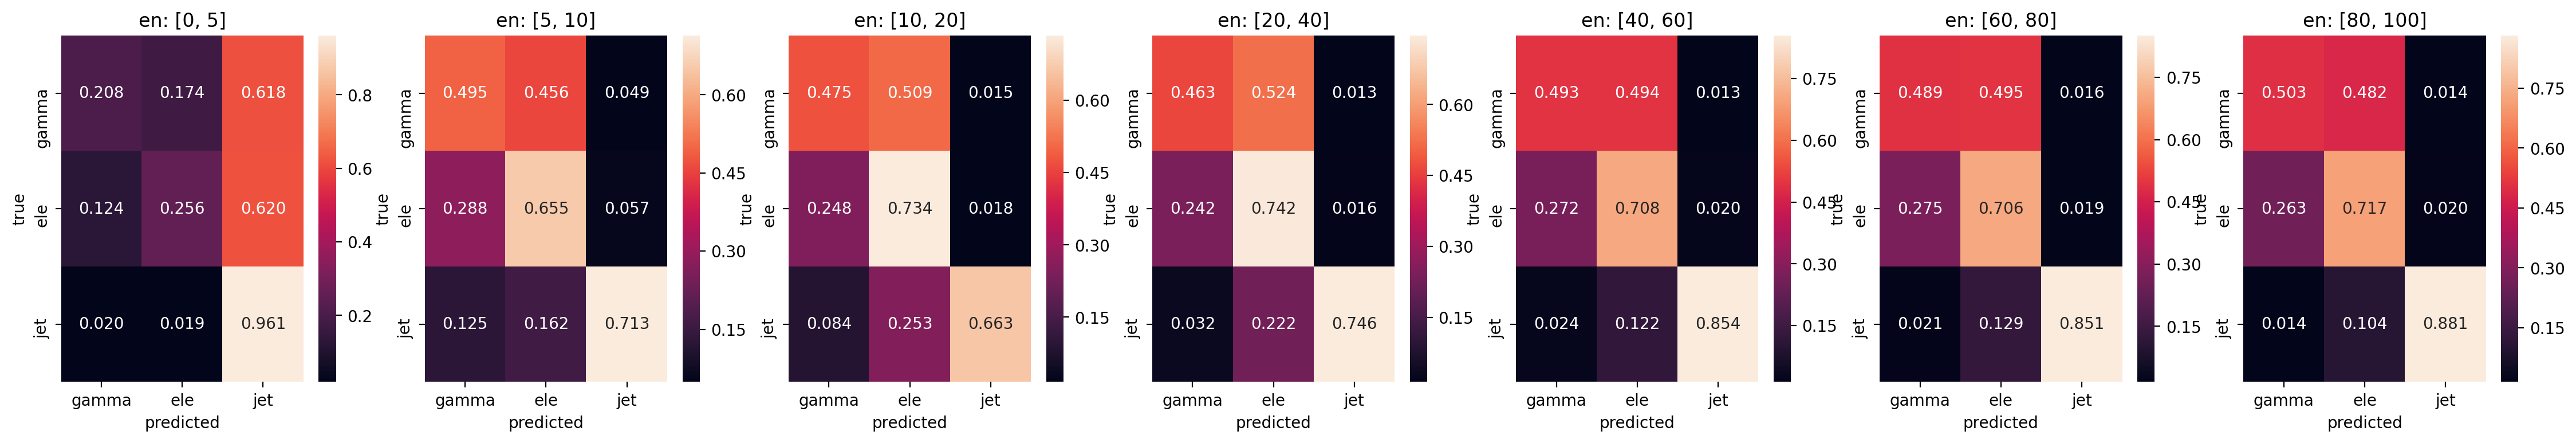

In [32]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
#fig.suptitle("gamma vs. jet (genpt_weights)")
for i, energy in enumerate(energies): 
    confusion_matrix(genpt_et_df_gamma.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     genpt_et_df_ele.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     genpt_et_df_jet.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     ax=axis[i])
    axis[i].set_title("en: {}".format(energy))

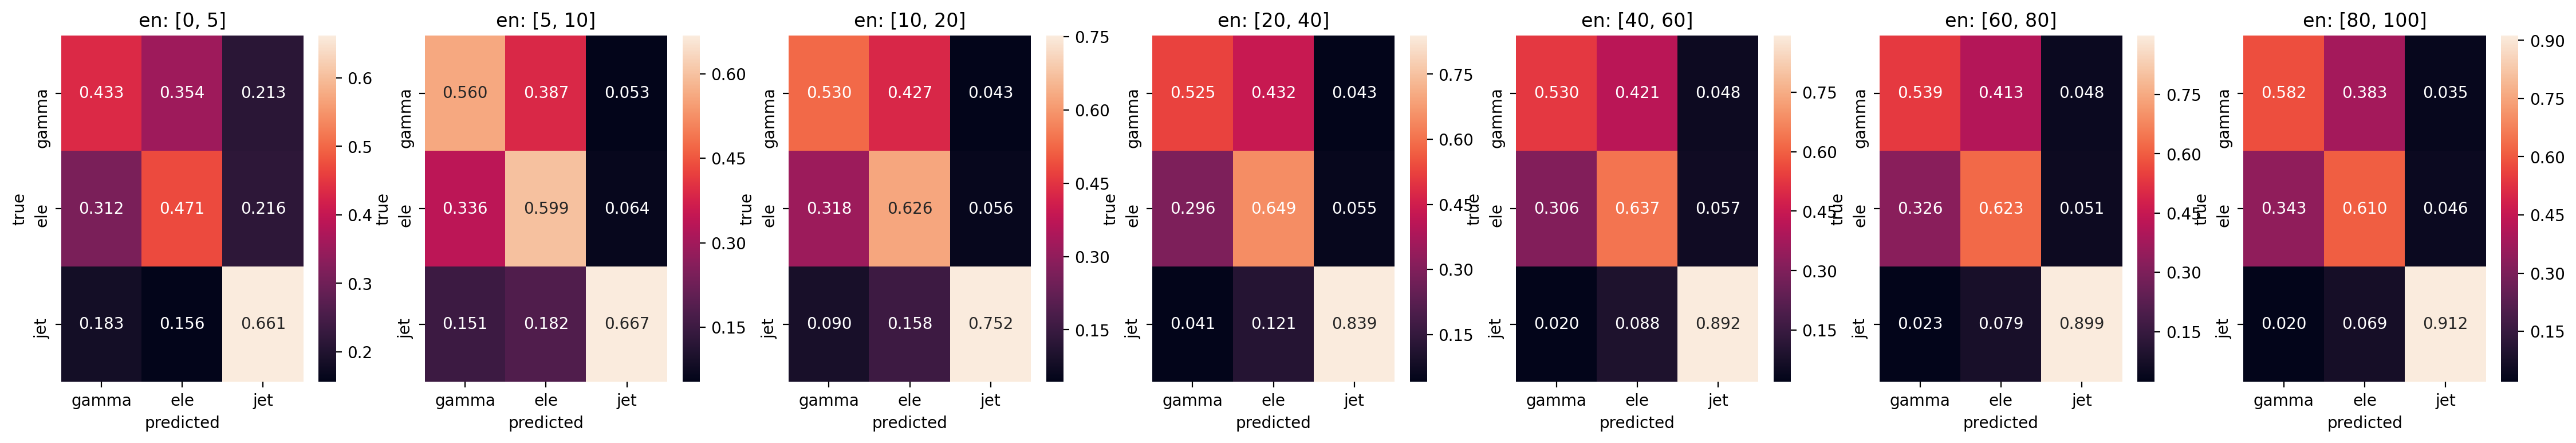

In [34]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
#fig.suptitle("gamma vs. jet (genpt_weights)")
for i, energy in enumerate(energies): 
    confusion_matrix(et_df_gamma.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     et_df_ele.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     et_df_jet.query('Et_true > @energy[0] & Et_true < @energy[1]'), 
                     ax=axis[i])
    axis[i].set_title("en: {}".format(energy))

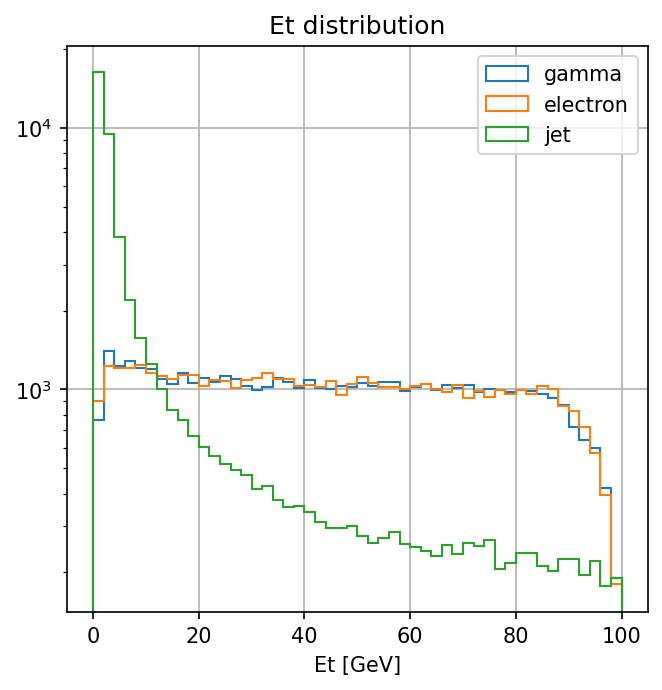

In [7]:
# Et_true - sum of the clusters in the window
plt.hist(df_gamma['Et_true'], histtype='step', label='gamma', weights=df_gamma['weight'], bins=50, range=(0,100))
plt.hist(df_ele['Et_true'], histtype='step', label='electron', weights=df_ele['weight'], bins=50, range=(0,100))
# plt.hist(df_gamma['Et_true'], histtype='step', label='gamma', bins=50, range=(0,100))
# plt.hist(df_ele['Et_true'], histtype='step', label='electron', bins=50, range=(0,100))
plt.hist(df_jet['Et_true'], histtype='step', label='jet', bins=50, range=(0,100))
plt.grid()
plt.legend(loc="upper right")
plt.xlabel('Et [GeV]')
plt.title('Et distribution')
plt.yscale('log')

#plt.savefig(data_path +"n_clusters_true_log.png")
#plt.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/training_33/n_clusters_true_log.png
#plt.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/validation_plots/new_ds_Et.png")

In [8]:
energies = [[0,5], [5,10], [10,20], [20,40], [40,60], [60,80], [80,100]]

In [36]:
def plot_roc_energy(df_true, df_false, name='gamma', ax=None, energy=[0,120], color='darkorange', label='ROC curve'):
    
    true_values = df_true['w_'+name][(df_true.Et_true>energy[0]) & (df_true.Et_true<energy[1])]
    false_values = df_false['w_'+name][(df_false.Et_true>energy[0]) & (df_false.Et_true<energy[1])]
    yscore = np.concatenate([true_values, false_values])
    ytrue = np.concatenate([np.ones(shape=true_values.shape[0]), np.zeros(shape=false_values.shape[0])])
    
    w = np.concatenate([df_true['weight'][(df_true.Et_true>energy[0]) & (df_true.Et_true<energy[1])], df_false['weight'][(df_false.Et_true>energy[0]) & (df_false.Et_true<energy[1])]])
    
    fpr, tpr, _ = roc_curve(ytrue, yscore, sample_weight=w)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label= label+' (area = %0.3f)' % roc_auc, color=color)
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.grid(True)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate') 
    ax.legend(loc="lower right")
#     if len(condition) < 10: 
    ax.set_title("en: {}".format(energy))
#     else: 
    #ax.set_title("{}".format(name))

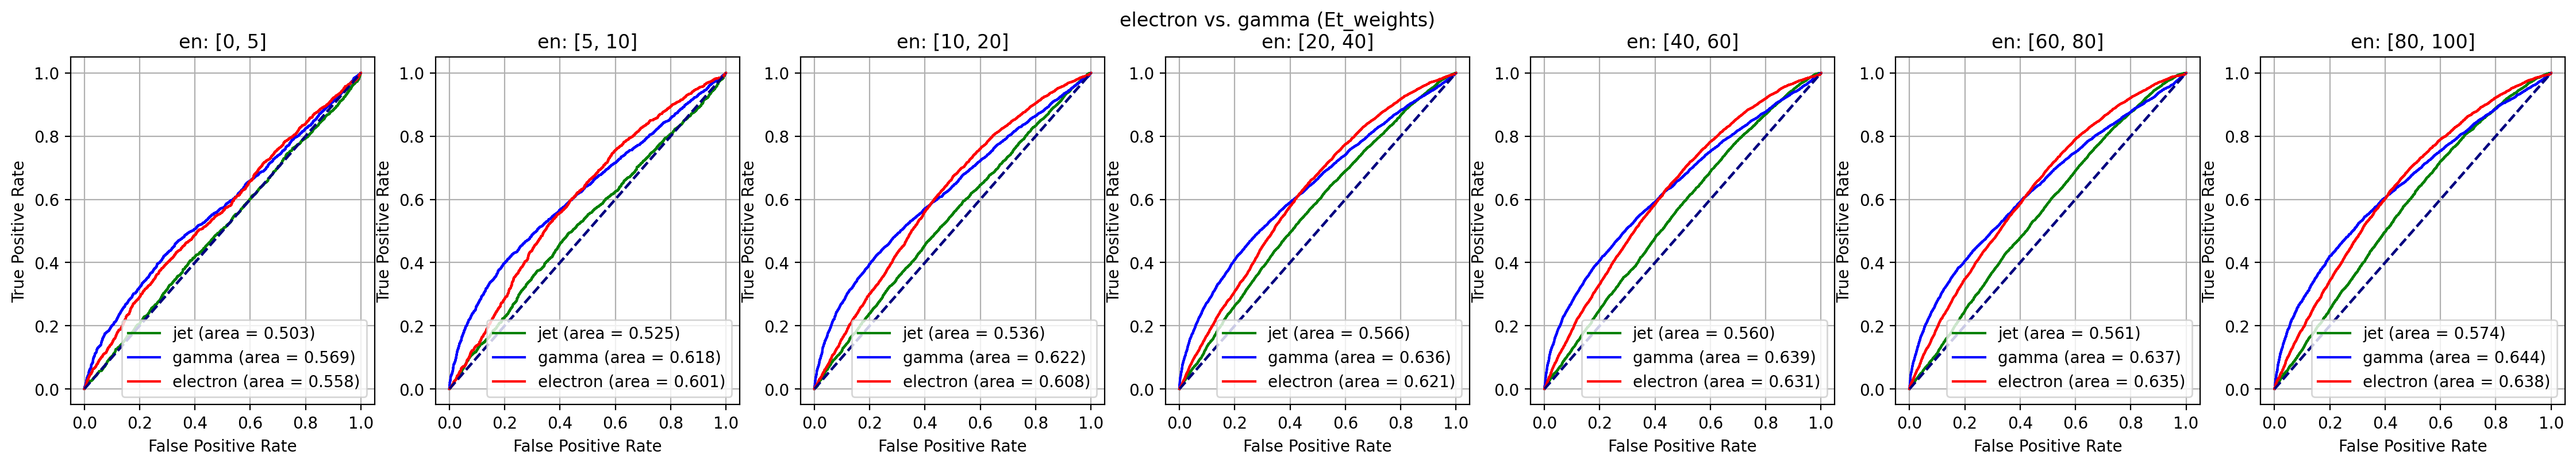

In [48]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
fig.suptitle("electron vs. gamma (Et_weights)")
for i, energy in enumerate(energies): 
    #plot_roc_energy(df_jet_old, df_gamma_old, name='nomatch', ax=axis[i], energy=energy, label='w/o weights')
    plot_roc_energy(et_df_ele, et_df_gamma, name='jet', ax=axis[i], energy=energy, color='green', label='jet')
    
    #plot_roc_energy(df_gamma_old, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='red', label='w/o weights gamma')
    plot_roc_energy(et_df_gamma, et_df_ele, name='gamma', ax=axis[i], energy=energy, color='blue', label='gamma')
    plot_roc_energy(et_df_ele, et_df_gamma, name='ele', ax=axis[i], energy=energy, color='red', label='electron')
#fig.savefig(data_path +"roc_Et_ele_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/roc_Et_comparison.png")

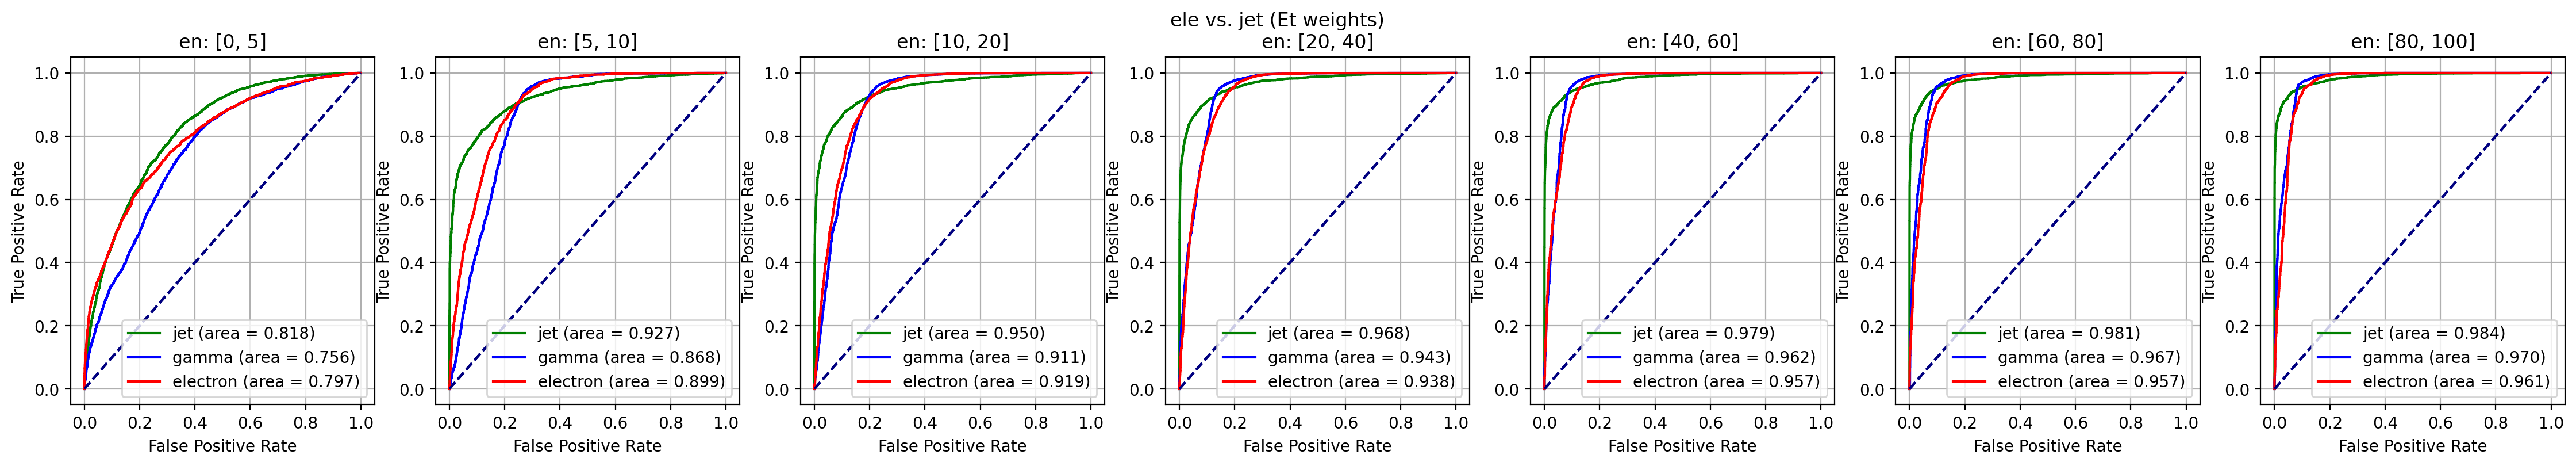

In [50]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
fig.suptitle("ele vs. jet (Et weights)")
for i, energy in enumerate(energies): 
    #plot_roc_energy(df_jet_old, df_gamma_old, name='nomatch', ax=axis[i], energy=energy, label='w/o weights')
    plot_roc_energy(et_df_jet, et_df_ele, name='jet', ax=axis[i], energy=energy, color='green', label='jet')
    
    #plot_roc_energy(df_gamma_old, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='red', label='w/o weights gamma')
    plot_roc_energy(et_df_ele, et_df_jet, name='gamma', ax=axis[i], energy=energy, color='blue', label='gamma')
    plot_roc_energy(et_df_ele, et_df_jet, name='ele', ax=axis[i], energy=energy, color='red', label='electron')
#fig.savefig(data_path +"roc_Et_ele_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/roc_Et_comparison.png")

In [56]:
no_w_conf_matrix = np.array(no_w_conf_matrix)

In [57]:
no_w_conf_matrix

array([[[0.19917324, 0.17023675, 0.63059   ],
        [0.11821204, 0.2486147 , 0.63317325],
        [0.01878937, 0.01846909, 0.96274154]],

       [[0.49421375, 0.45779442, 0.04799183],
        [0.288831  , 0.65646369, 0.05470531],
        [0.12177811, 0.16342921, 0.71479268]],

       [[0.47884228, 0.50760212, 0.0135556 ],
        [0.24627395, 0.73633783, 0.01738822],
        [0.08878092, 0.25375442, 0.65746466]],

       [[0.47167325, 0.51599849, 0.01232825],
        [0.25002319, 0.73448372, 0.01549309],
        [0.03538663, 0.22302315, 0.74159021]],

       [[0.50733081, 0.4803379 , 0.01233129],
        [0.28194726, 0.69873467, 0.01931807],
        [0.02417127, 0.12396409, 0.85186464]],

       [[0.50129948, 0.48330668, 0.01539384],
        [0.28492184, 0.69732728, 0.01775088],
        [0.02110054, 0.12825817, 0.85064129]],

       [[0.51129415, 0.47485336, 0.01385249],
        [0.27072556, 0.70990848, 0.01936596],
        [0.01364064, 0.10630292, 0.88005644]]])

0.19917324314167606 0.6305900037579857
0.494213750850919 0.04799183117767188
0.47884227880564206 0.01355559626305184
0.47167325428194995 0.012328251458686242
0.5073308088163899 0.012331294300417517
0.5012994802079168 0.015393842463014795
0.511294147011107 0.013852489704230626


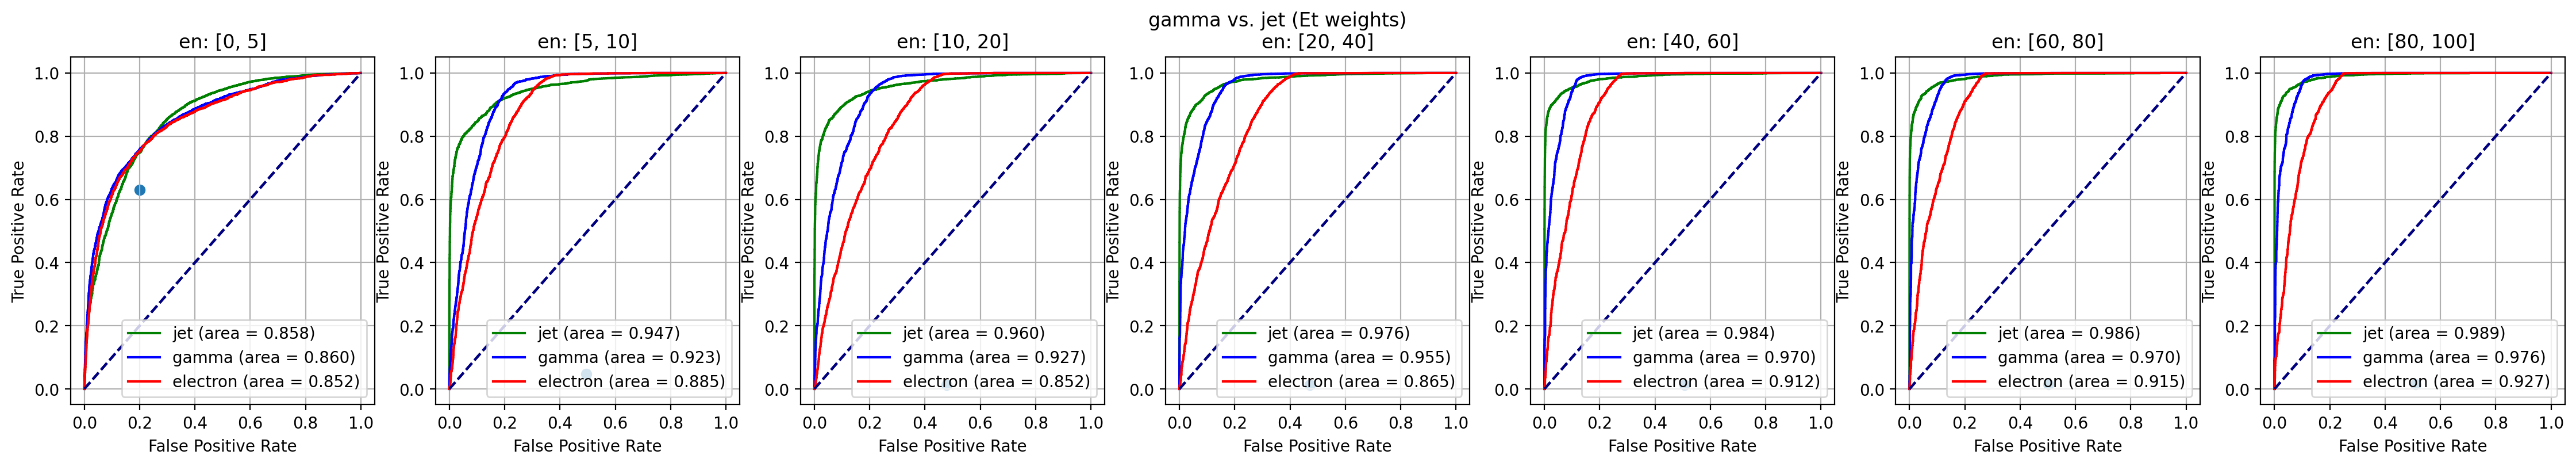

In [64]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
fig.suptitle("gamma vs. jet (Et weights)")
for i, energy in enumerate(energies): 
    #plot_roc_energy(df_jet_old, df_gamma_old, name='nomatch', ax=axis[i], energy=energy, label='w/o weights')
    plot_roc_energy(no_w_df_jet, no_w_df_gamma, name='jet', ax=axis[i], energy=energy, color='green', label='jet')
    
    #plot_roc_energy(df_gamma_old, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='red', label='w/o weights gamma')
    plot_roc_energy(no_w_df_gamma, no_w_df_jet, name='gamma', ax=axis[i], energy=energy, color='blue', label='gamma')
    plot_roc_energy(no_w_df_gamma, no_w_df_jet, name='ele', ax=axis[i], energy=energy, color='red', label='electron')
    
    print(no_w_conf_matrix[i][0][0], no_w_conf_matrix[i][0][2])
    axis[i].scatter(no_w_conf_matrix[i][0][0], no_w_conf_matrix[i][0][2])
#fig.savefig(data_path +"roc_Et_ele_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/roc_Et_comparison.png")

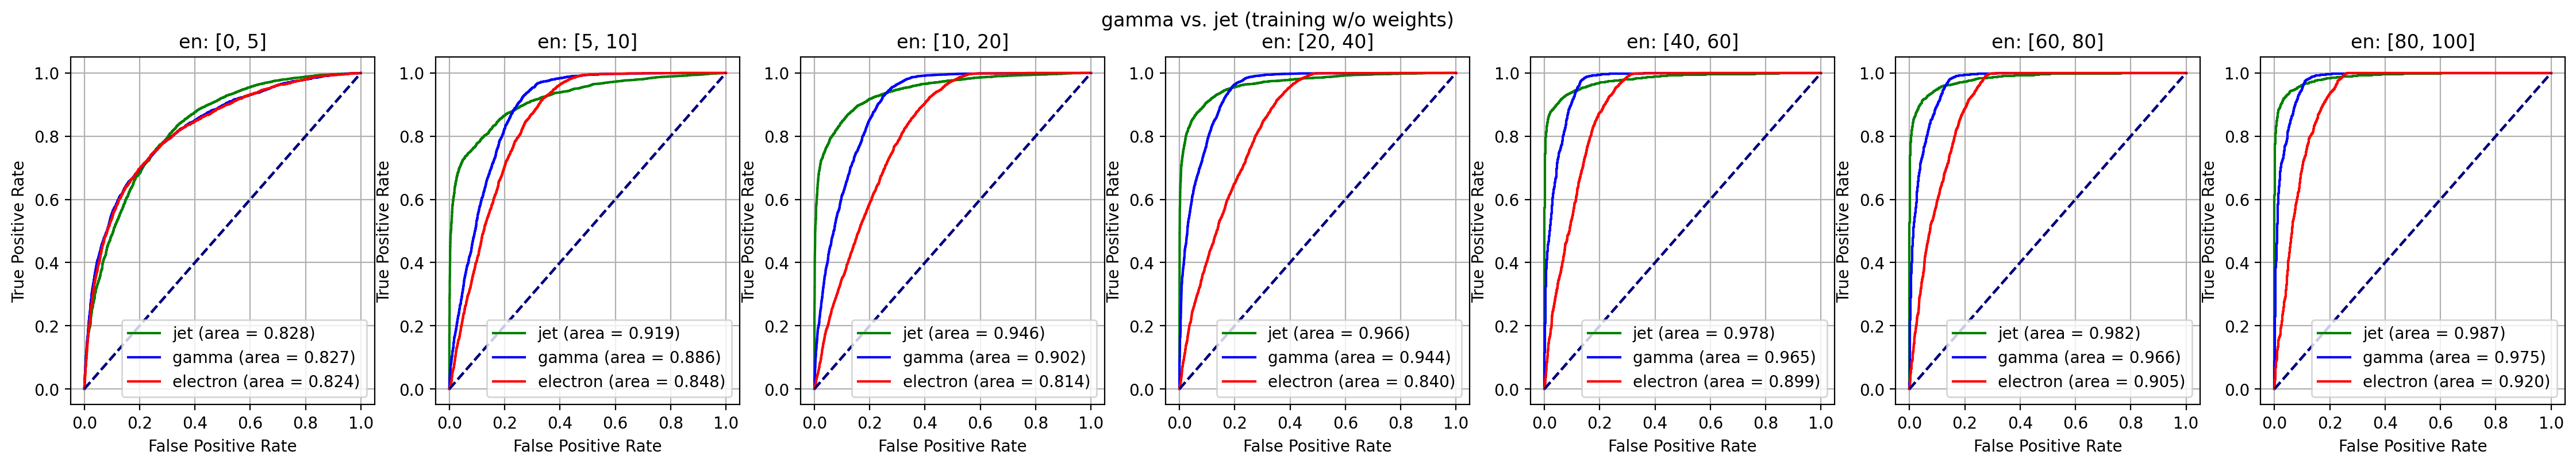

In [15]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
fig.suptitle("gamma vs. jet (training w/o weights)")
for i, energy in enumerate(energies): 
    #plot_roc_energy(df_jet_old, df_gamma_old, name='nomatch', ax=axis[i], energy=energy, label='w/o weights')
    plot_roc_energy(df_jet_old, df_gamma_old, name='nomatch', ax=axis[i], energy=energy, color='green', label='jet')
    
    #plot_roc_energy(df_gamma_old, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='red', label='w/o weights gamma')
    plot_roc_energy(df_gamma_old, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='blue', label='gamma')
    plot_roc_energy(df_gamma_old, df_jet_old, name='ele', ax=axis[i], energy=energy, color='red', label='electron')
#fig.savefig(data_path +"roc_Et_ele_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/roc_Et_comparison.png")

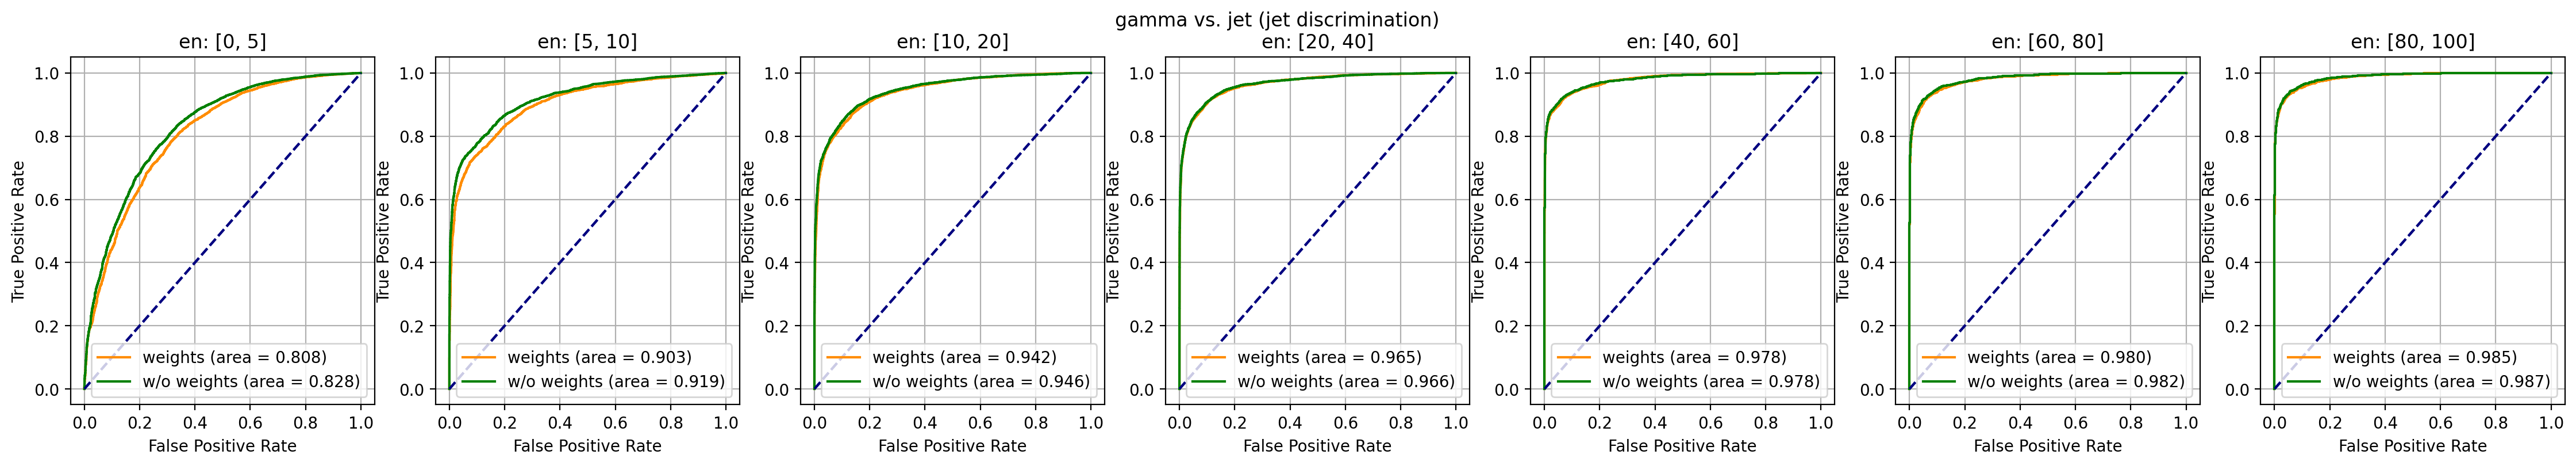

In [20]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
fig.suptitle("gamma vs. jet (jet discrimination)")
for i, energy in enumerate(energies): 
    plot_roc_energy(df_jet, df_gamma, name='nomatch', ax=axis[i], energy=energy, label='weights')
    plot_roc_energy(df_jet_old, df_gamma_old, name='nomatch', ax=axis[i], energy=energy, color='green', label='w/o weights')
    
    #plot_roc_energy(df_gamma_old, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='red', label='w/o weights gamma')
    #plot_roc_energy(df_gamma_, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='blue', label='weights gamma')
    #plot_roc_energy(df_gamma_old, df_jet_old, name='ele', ax=axis[i], energy=energy, color='red', label='weights ele')
#fig.savefig(data_path +"roc_Et_ele_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/roc_Et_comparison.png")

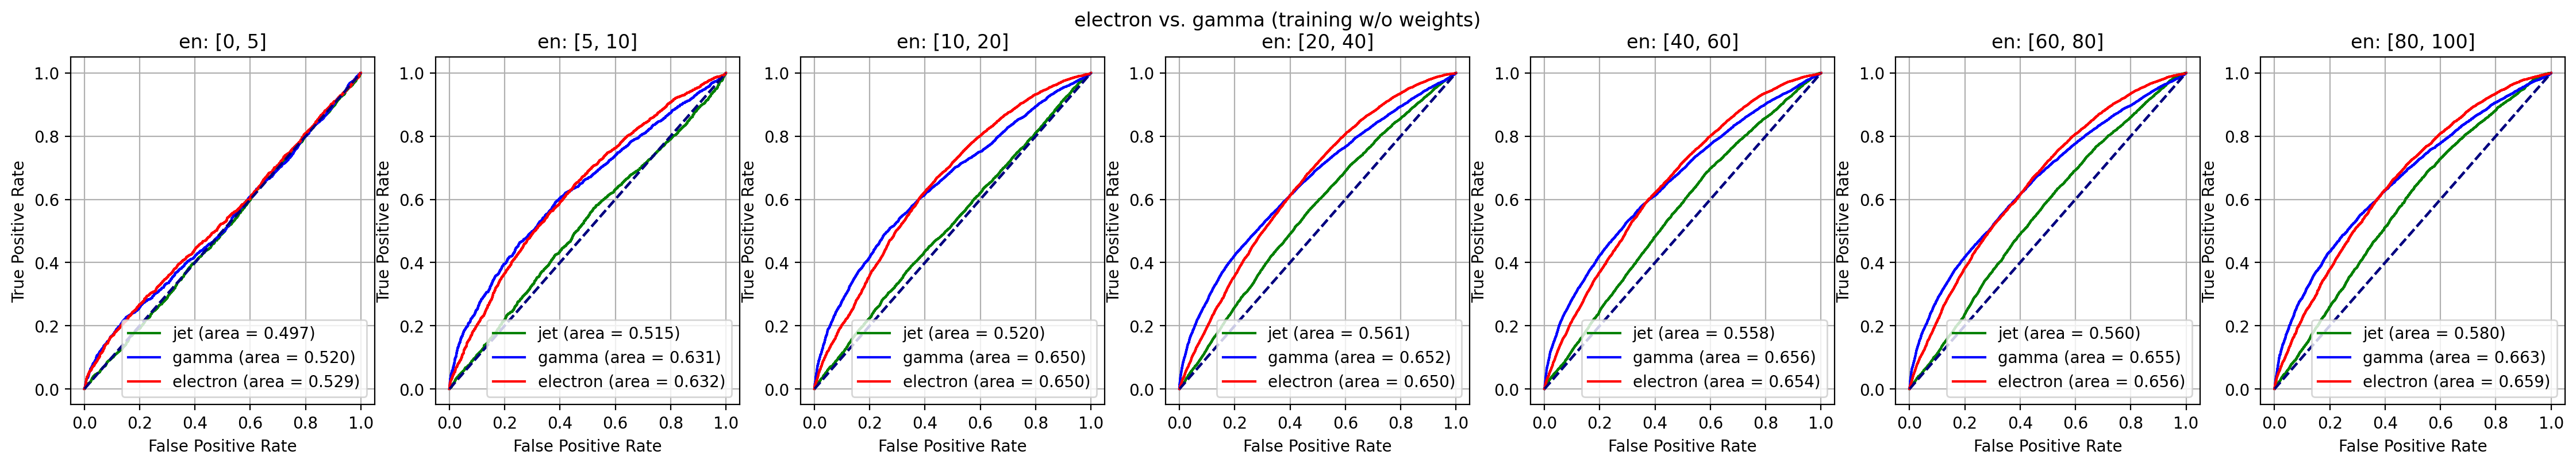

In [23]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
fig.suptitle("electron vs. gamma (training w/o weights)")
for i, energy in enumerate(energies): 
    #plot_roc_energy(df_jet_old, df_gamma_old, name='nomatch', ax=axis[i], energy=energy, label='w/o weights')
    plot_roc_energy(df_ele_old, df_gamma_old, name='nomatch', ax=axis[i], energy=energy, color='green', label='jet')
    
    #plot_roc_energy(df_gamma_old, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='red', label='w/o weights gamma')
    plot_roc_energy(df_gamma_old, df_ele_old, name='gamma', ax=axis[i], energy=energy, color='blue', label='gamma')
    plot_roc_energy(df_ele_old, df_gamma_old, name='ele', ax=axis[i], energy=energy, color='red', label='electron')
#fig.savefig(data_path +"roc_Et_ele_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/roc_Et_comparison.png")

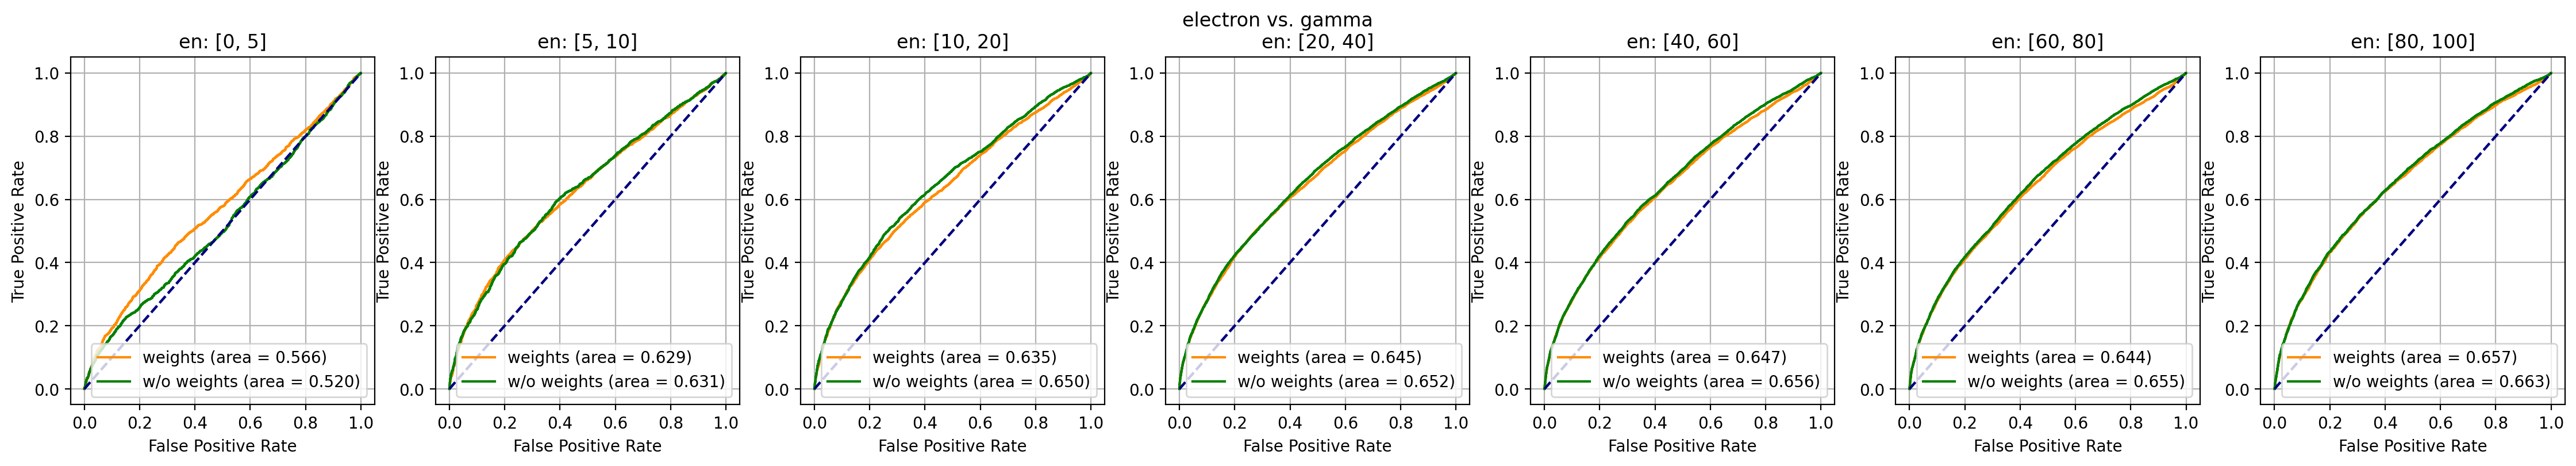

In [24]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
fig.suptitle("electron vs. gamma")
for i, energy in enumerate(energies): 
    plot_roc_energy(df_gamma, df_ele, name='gamma', ax=axis[i], energy=energy, label='weights')
    plot_roc_energy(df_gamma_old, df_ele_old, name='gamma', ax=axis[i], energy=energy, color='green', label='w/o weights')
    
    #plot_roc_energy(df_gamma_old, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='red', label='w/o weights gamma')
    #plot_roc_energy(df_gamma_, df_jet_old, name='gamma', ax=axis[i], energy=energy, color='blue', label='weights gamma')
    #plot_roc_energy(df_gamma_old, df_jet_old, name='ele', ax=axis[i], energy=energy, color='red', label='weights ele')
#fig.savefig(data_path +"roc_Et_ele_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/roc_Et_comparison.png")

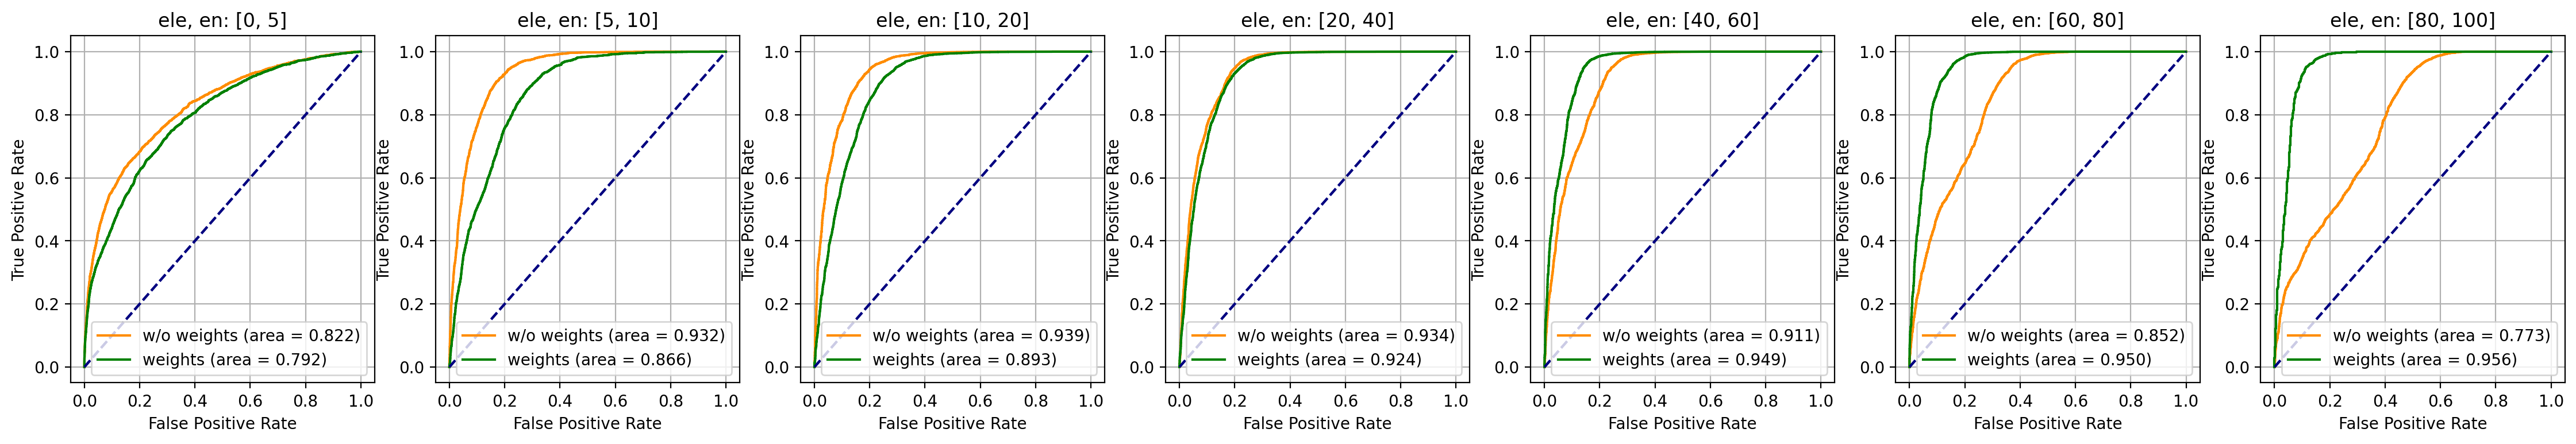

In [67]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
for i, energy in enumerate(energies): 
    plot_roc_energy(df_ele_old, df_jet_old, name='ele', ax=axis[i], energy=energy, label='w/o weights')
    plot_roc_energy(df_ele, df_jet, name='ele', ax=axis[i], energy=energy, color='green', label='weights')
#fig.savefig(data_path +"roc_Et_ele_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/roc_Et_comparison.png")

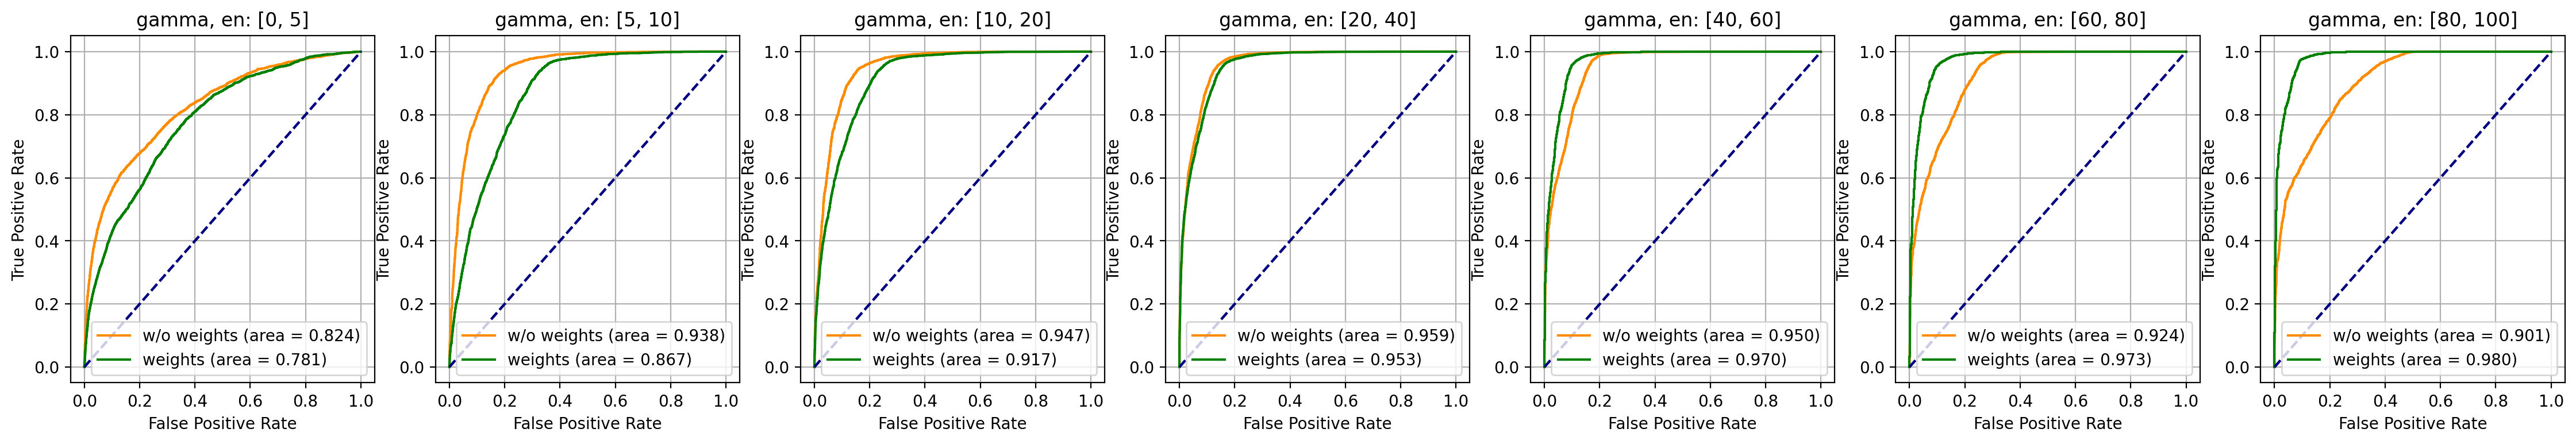

In [69]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
for i, energy in enumerate(energies): 
    plot_roc_energy(df_gamma_old, df_jet_old, name='gamma', ax=axis[i], energy=energy, label='w/o weights')
    plot_roc_energy(df_gamma, df_jet, name='gamma', ax=axis[i], color='green', energy=energy, label='weights')
#fig.savefig(data_path +"roc_Et_gamma_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/roc_Et_gamma_comparison.png")

In [71]:
def plot_probability_energy(df, name='Test', ax=None, energy=[0,120]):
    if not ax: 
        fig, ax = plt.subplots(1)
    ax.hist(df['w_gamma'][(df.Et_true>energy[0]) & (df.Et_true<energy[1])], histtype='step',range=(0, 1), bins=50, label='gamma')
    ax.hist(df['w_ele'][(df.Et_true>energy[0]) & (df.Et_true<energy[1])], histtype='step', range=(0,1), bins=50, label='electron')
    ax.hist(df['w_nomatch'][(df.Et_true>energy[0]) & (df.Et_true<energy[1])], histtype='step', range=(0,1), bins=50, label='jet')
    ax.grid()
    
    ax.legend(loc='best', prop={'size': 10})
#     if len(condition) < 10: 
    ax.set_title("{}, en: {}".format(name, energy))
#     else: 
#         ax.set_title("{}".format(name))

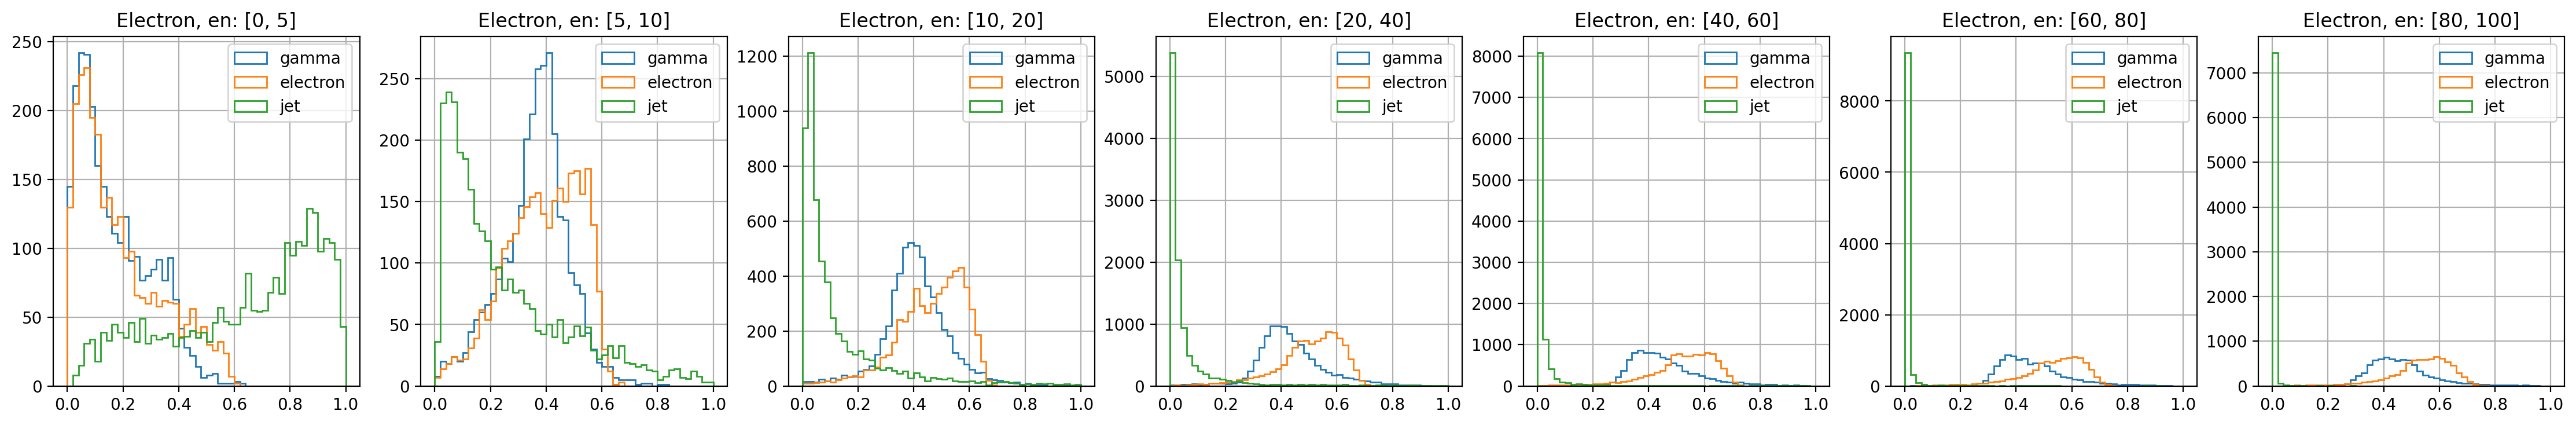

In [75]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
for i, energy in enumerate(energies): 
    plot_probability_energy(df_ele_old, name='Electron', ax=axis[i], energy=energy)
#fig.savefig(data_path +"prob_distr_Et_ele.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/prob_distr_Et_ele.png")

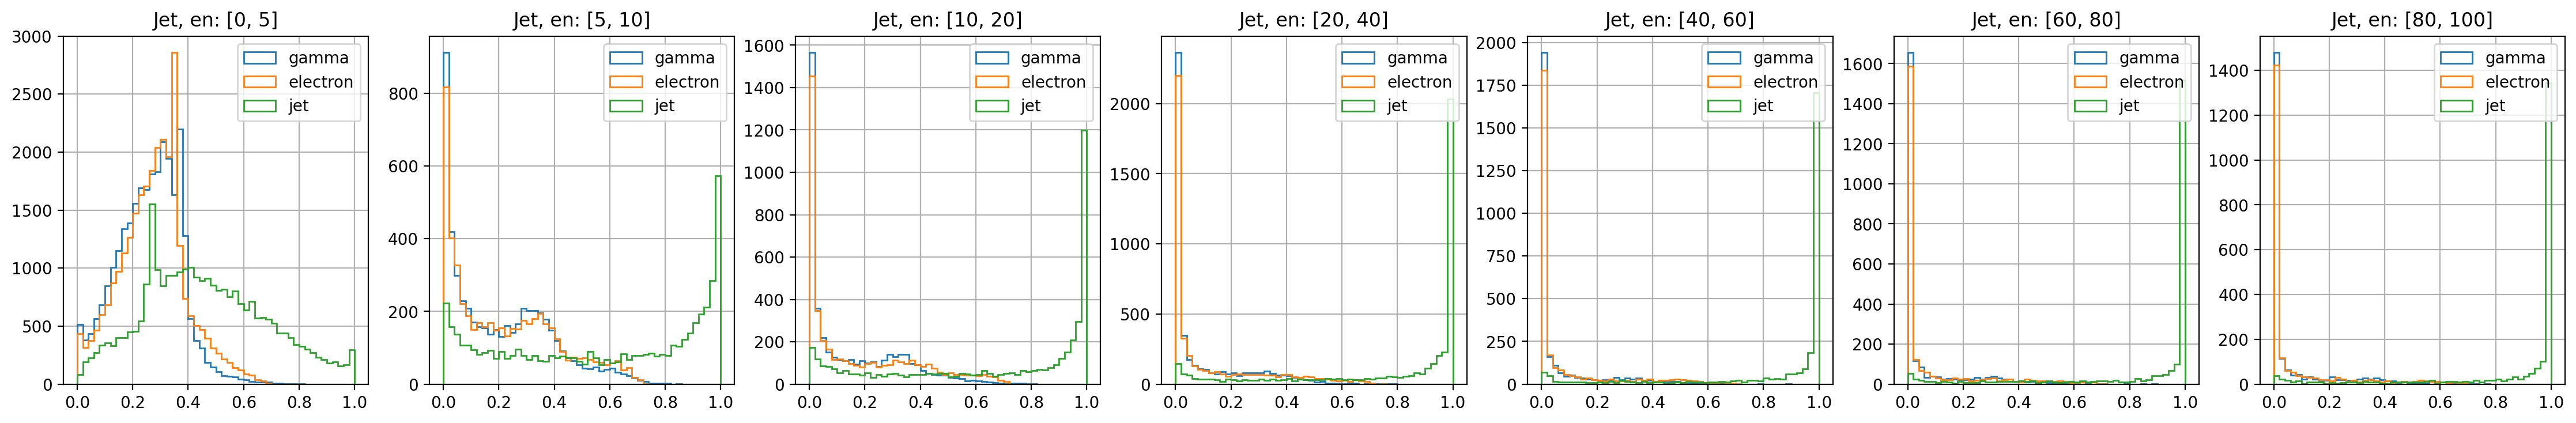

In [73]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
for i, energy in enumerate(energies): 
    plot_probability_energy(df_jet, name='Jet', ax=axis[i], energy=energy)
#fig.savefig(data_path +"prob_distr_Et_jet.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/prob_distr_Et_jet.png")

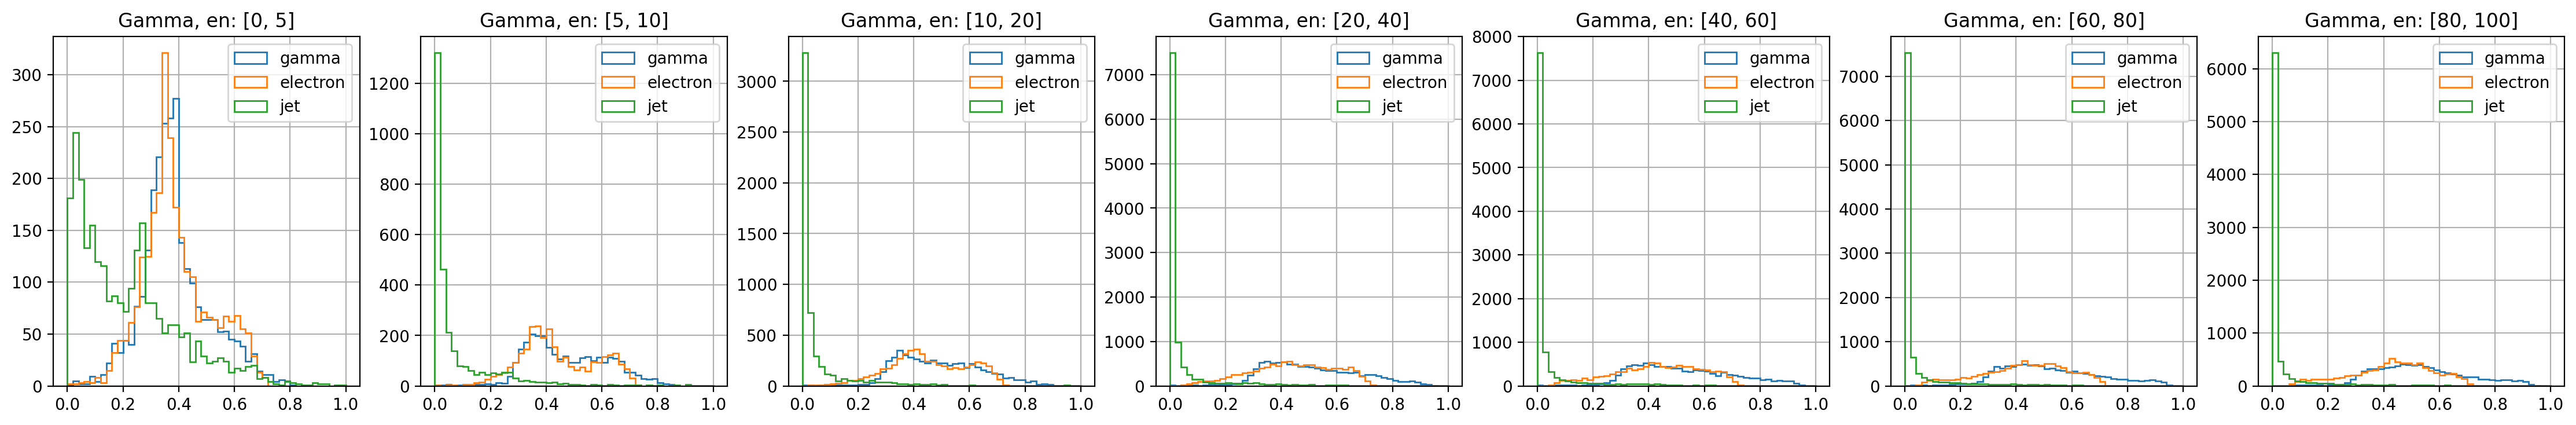

In [74]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
for i, energy in enumerate(energies): 
    plot_probability_energy(df_gamma, name='Gamma', ax=axis[i], energy=energy)
#fig.savefig(data_path +"prob_distr_Et_gamma.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/prob_distr_Et_gamma.png")

In [82]:
def plot_probability_energy_df(prob, name='Test', ax=None, energy=[0,120]):
    if not ax: 
        fig, ax = plt.subplots(1)
    ax.hist(df_gamma[prob][(df_gamma.Et_true>energy[0]) & (df_gamma.Et_true<energy[1])], histtype='step',range=(0, 1), bins=50, label='gamma', density=True)
    ax.hist(df_ele[prob][(df_ele.Et_true>energy[0]) & (df_ele.Et_true<energy[1])], histtype='step', range=(0,1), bins=50, label='electron', density=True)
    ax.hist(df_jet[prob][(df_jet.Et_true>energy[0]) & (df_jet.Et_true<energy[1])], histtype='step', range=(0,1), bins=50, label='jet', density=True)
    ax.grid()
    
    ax.legend(loc='upper right')
#     if len(condition) < 10: 
    ax.set_title("{}, en: {}".format(name, energy))
    ax.set_xlabel("probability")
#     else: 
#         ax.set_title("{}".format(name))

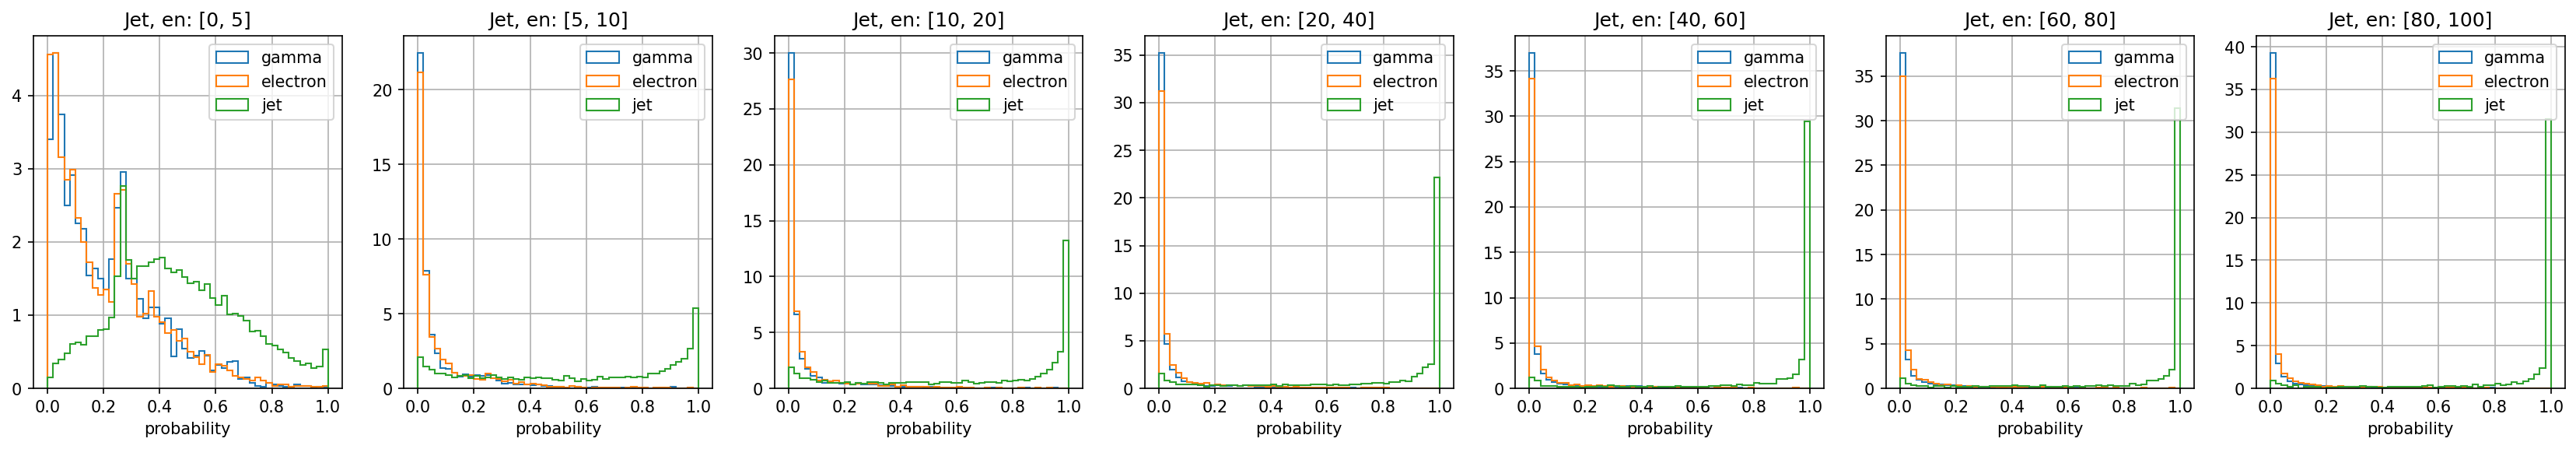

In [87]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4))
for i, energy in enumerate(energies): 
    plot_probability_energy_df('w_nomatch', name='Jet', ax=axis[i], energy=energy)
#fig.savefig(data_path +"prob_distr_Et_jet_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/prob_distr_Et_jet_newds.png")

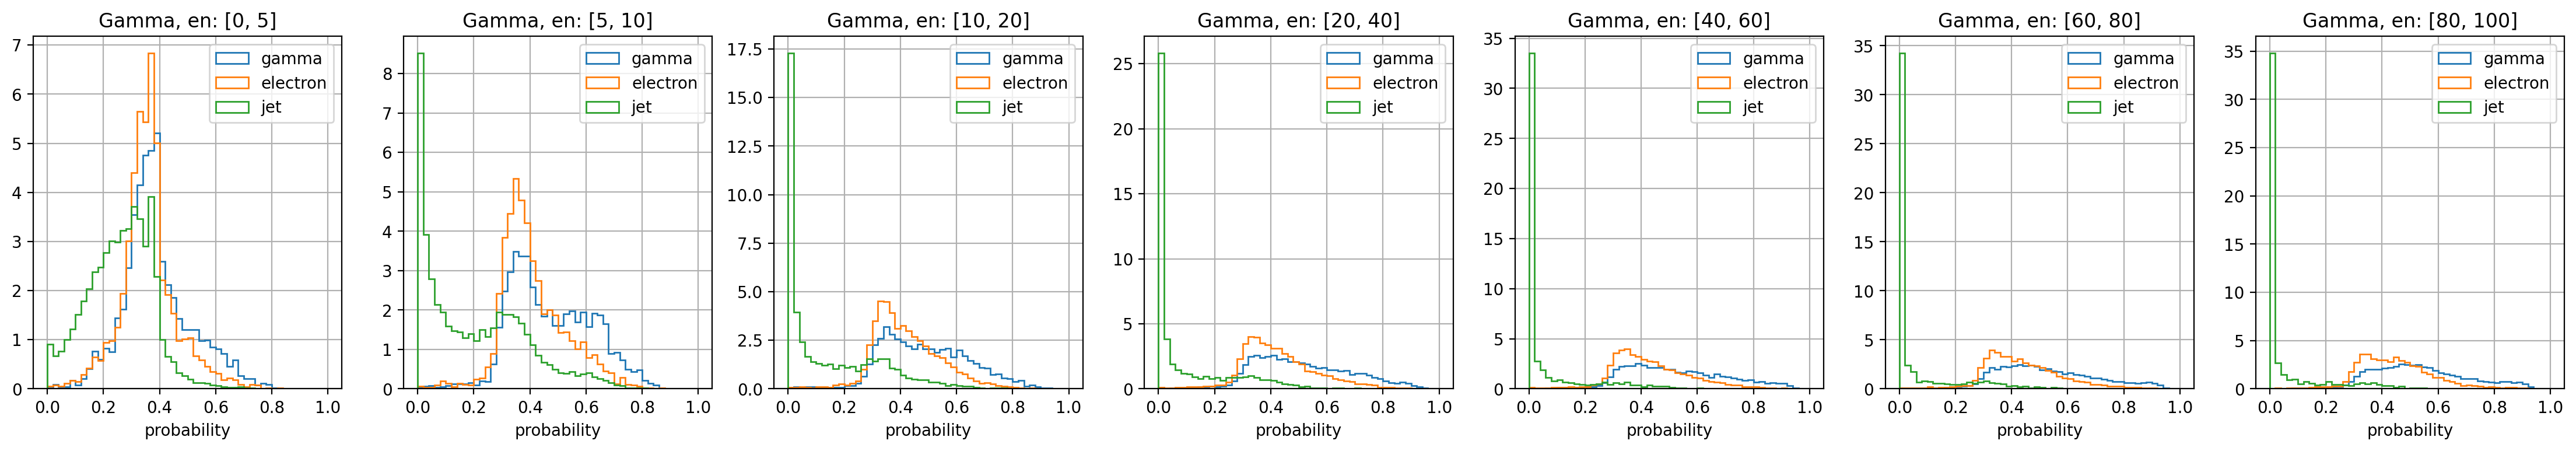

In [85]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
for i, energy in enumerate(energies): 
    plot_probability_energy_df('w_gamma', name='Gamma', ax=axis[i], energy=energy)
#fig.savefig(data_path +"prob_distr_Et_gamma_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/prob_distr_Et_gamma_newds.png")

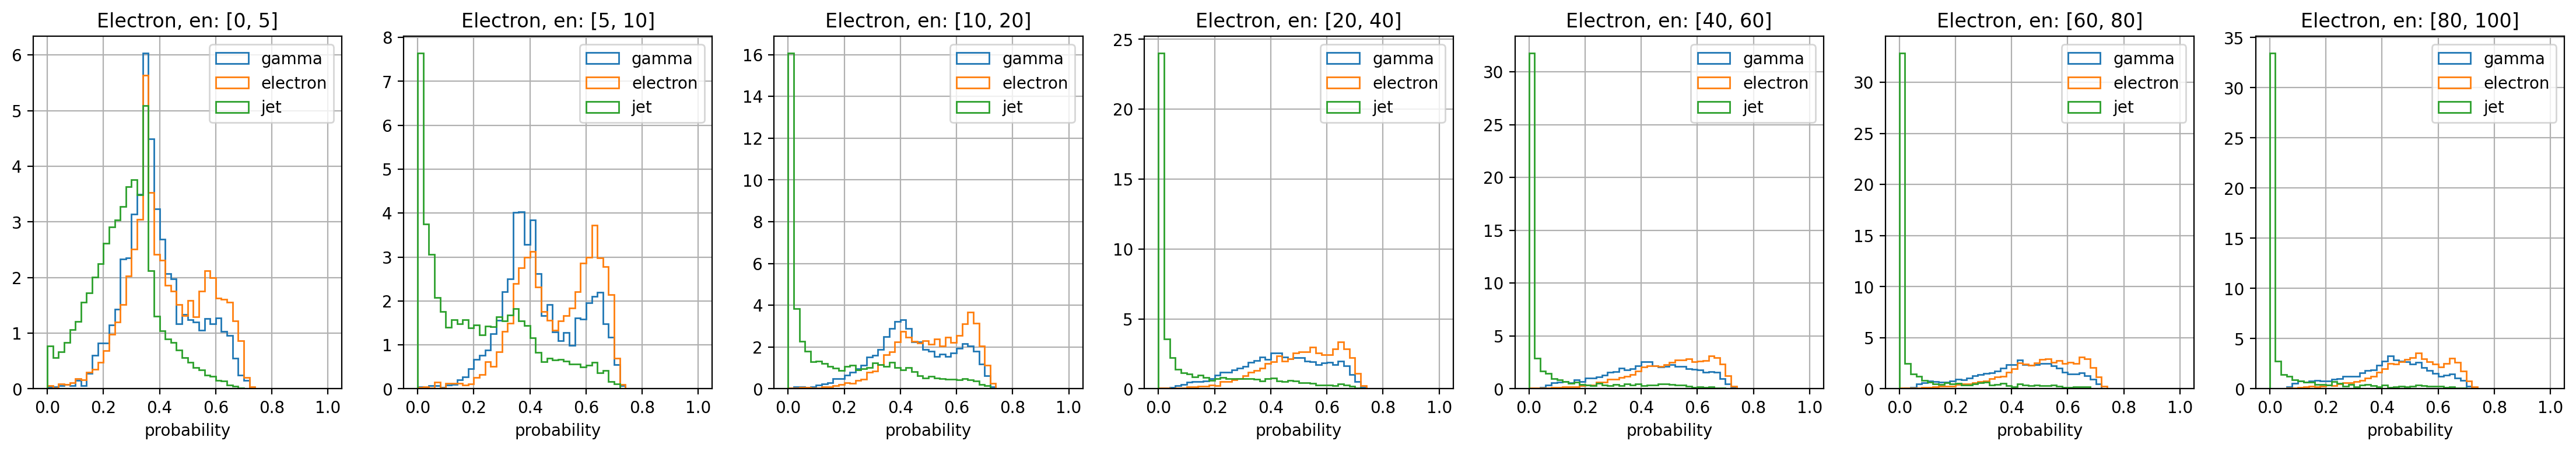

In [86]:
fig, axis = plt.subplots(1, 7, figsize=(28, 4), dpi=200)
for i, energy in enumerate(energies): 
    plot_probability_energy_df('w_ele', name='Electron', ax=axis[i], energy=energy)
#fig.savefig(data_path +"prob_distr_Et_ele_newds.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/jet_high_en/prob_distr_Et_ele_newds.png")

Text(0.5, 0, 'probability')

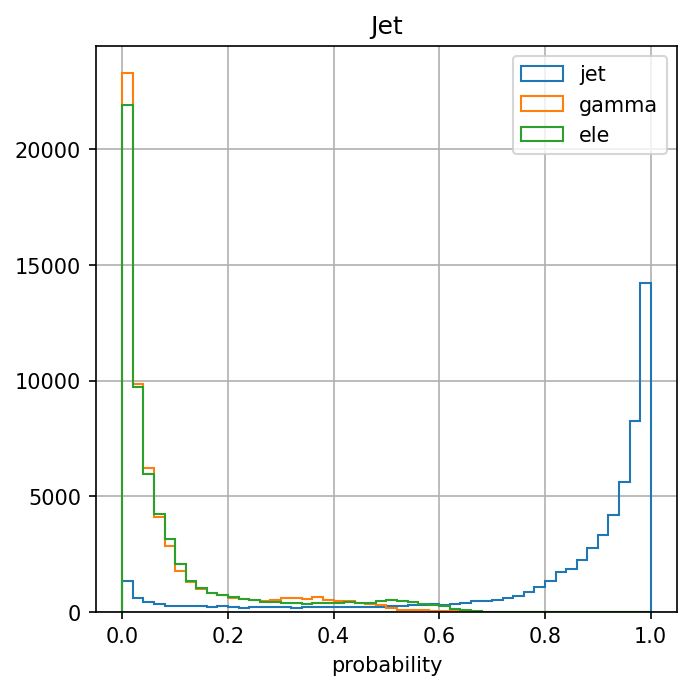

In [98]:
plt.hist(df_jet['w_nomatch'], range=(0,1), bins=50, label='jet', histtype='step')
plt.hist(df_jet['w_gamma'], range=(0,1), bins=50, label='gamma', histtype='step')
plt.hist(df_jet['w_ele'], range=(0,1), bins=50, label='ele', histtype='step')
plt.legend()
plt.grid()
plt.title('Jet')
plt.xlabel('probability')

Text(0.5, 0, 'probability')

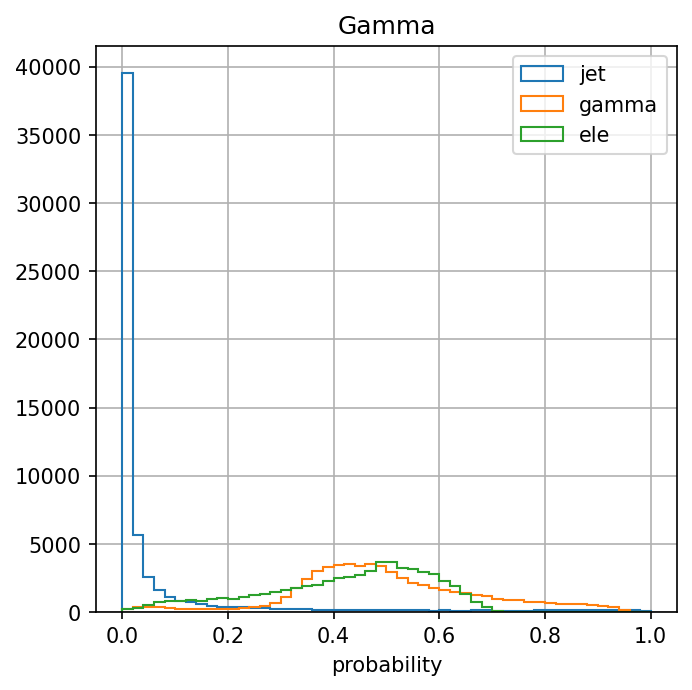

In [103]:
plt.hist(df_gamma['w_nomatch'], range=(0,1), bins=50, label='jet', histtype='step')
plt.hist(df_gamma['w_gamma'], range=(0,1), bins=50, label='gamma', histtype='step')
plt.hist(df_gamma['w_ele'], range=(0,1), bins=50, label='ele', histtype='step')
plt.legend()
plt.grid()
plt.title('Gamma')
plt.xlabel('probability')

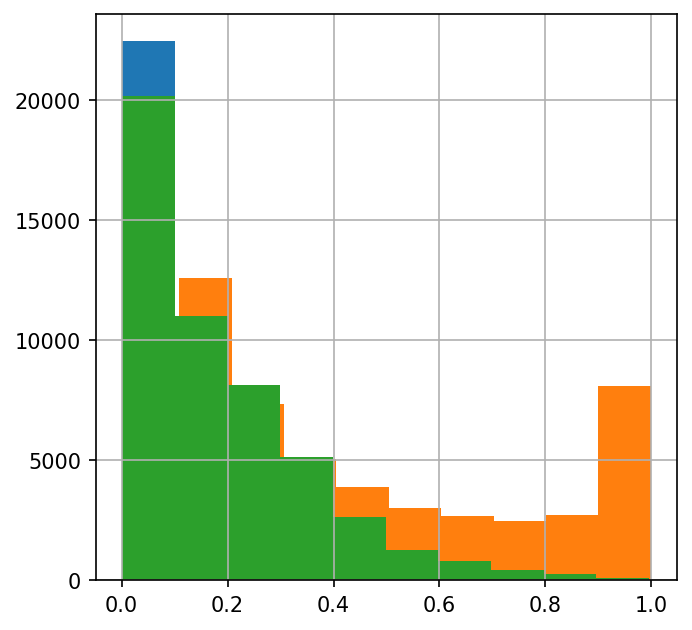

In [52]:
plt.hist(df_gamma['w_nomatch'])
plt.hist(df_jet['w_nomatch'])
plt.hist(df_ele['w_nomatch'])
plt.grid()

In [125]:
def plot_probability(df, name='Test', ax=None, condition=np.arange(0,100)):
    if not ax: 
        fig, ax = plt.subplots(1)
    ax.hist(df['w_gamma'][df['ncls'].isin(condition)], histtype='step', label='gamma')
    ax.hist(df['w_ele'][df['ncls'].isin(condition)], histtype='step', label='electron')
    ax.hist(df['w_nomatch'][df['ncls'].isin(condition)], histtype='step', label='jet')
    ax.grid()
    
    ax.legend(title='Probability', loc='upper center')
    if len(condition) < 10: 
        ax.set_title("{}, ncls: {}".format(name, condition))
    else: 
        ax.set_title("{}".format(name))

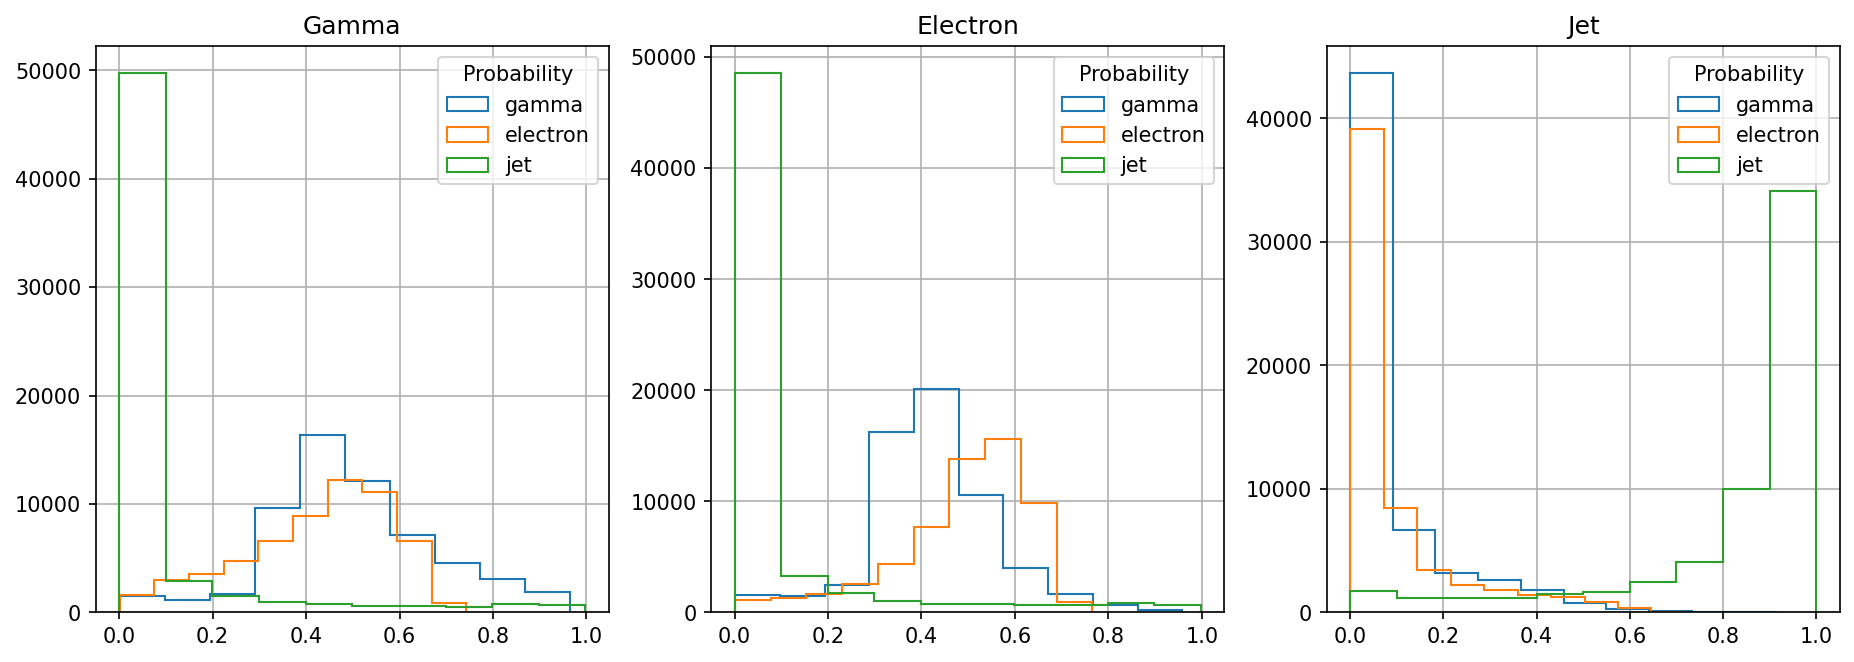

In [118]:
fig, axis = plt.subplots(1, 3, figsize=(15,5))
plot_probability(df_gamma, name='Gamma', ax=axis[0])
plot_probability(df_ele, name='Electron', ax=axis[1])
plot_probability(df_jet, name='Jet', ax=axis[2])

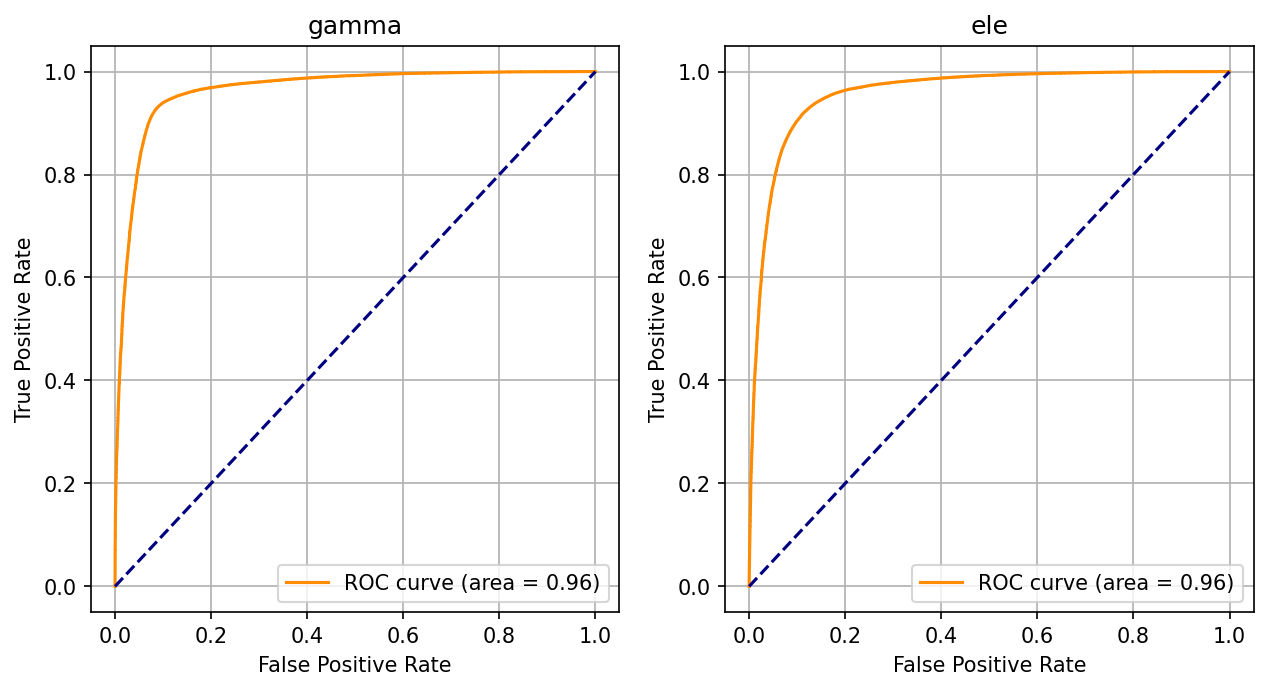

In [120]:
fig, axis = plt.subplots(1, 2, figsize=(10,5))

plot_roc(df_gamma, df_jet, name='gamma', ax=axis[0])
plot_roc(df_ele, df_jet, name='ele', ax=axis[1])

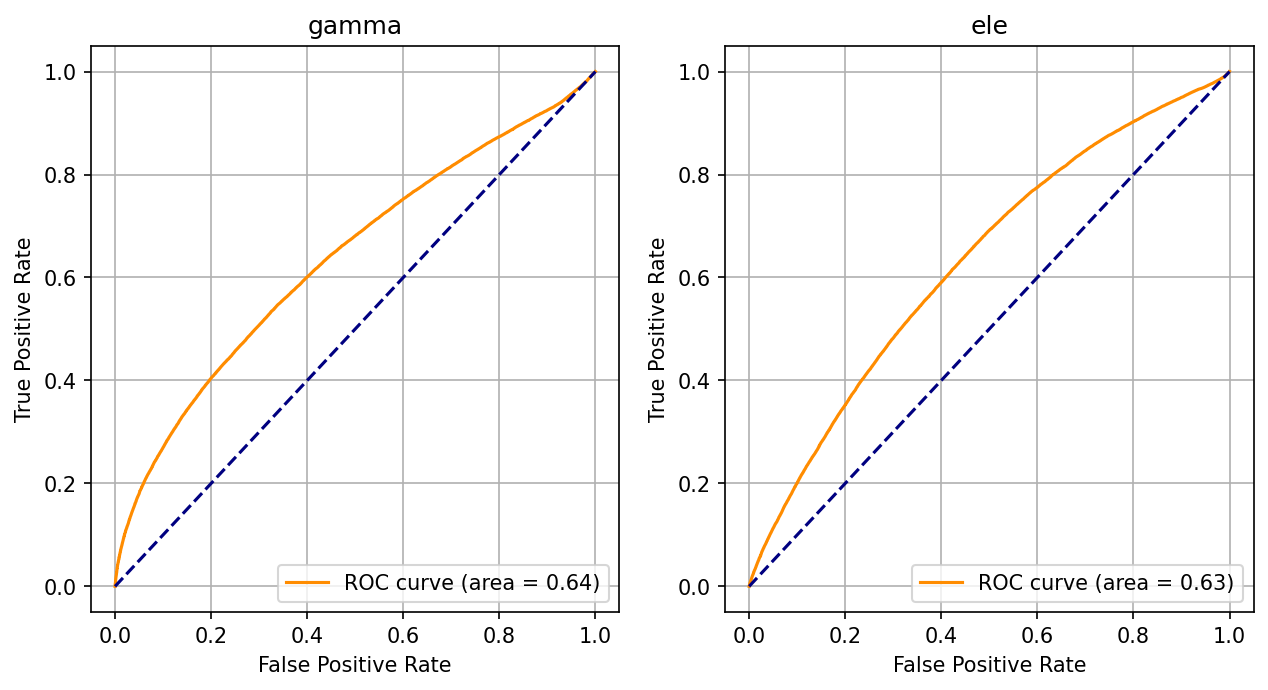

In [121]:
fig, axis = plt.subplots(1, 2, figsize=(10,5))

plot_roc(df_gamma, df_ele, name='gamma', ax=axis[0])
plot_roc(df_ele, df_gamma, name='ele', ax=axis[1])

In [169]:
def plot_roc(df_true, df_false, name='gamma', ax=None, condition=np.arange(0,100), color='darkorange'):
    
    true_values = df_true['w_'+name][df_true.ncls_sel.isin(condition)]
    false_values = df_false['w_'+name][df_false.ncls_sel.isin(condition)]
    yscore = np.concatenate([true_values, false_values])
    ytrue = np.concatenate([np.ones(shape=true_values.shape[0]), np.zeros(shape=false_values.shape[0])])
    
    fpr, tpr, _ = roc_curve(ytrue, yscore)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc, color=color)
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.grid(True)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate') 
    ax.legend(loc="lower right")
    if len(condition) < 10: 
        ax.set_title("{}, ncls: {}".format(name, condition))
    else: 
        ax.set_title("{}".format(name))

In [170]:
a = np.arange(0, 30, 5)
ncls = [np.arange(i, i+5) for i in a]
print(ncls)
color = ['c', 'm', 'k', 'darkorange', 'darkblue', 'crimson']

[array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]), array([10, 11, 12, 13, 14]), array([15, 16, 17, 18, 19]), array([20, 21, 22, 23, 24]), array([25, 26, 27, 28, 29])]


ValueError: Data is not binary and pos_label is not specified

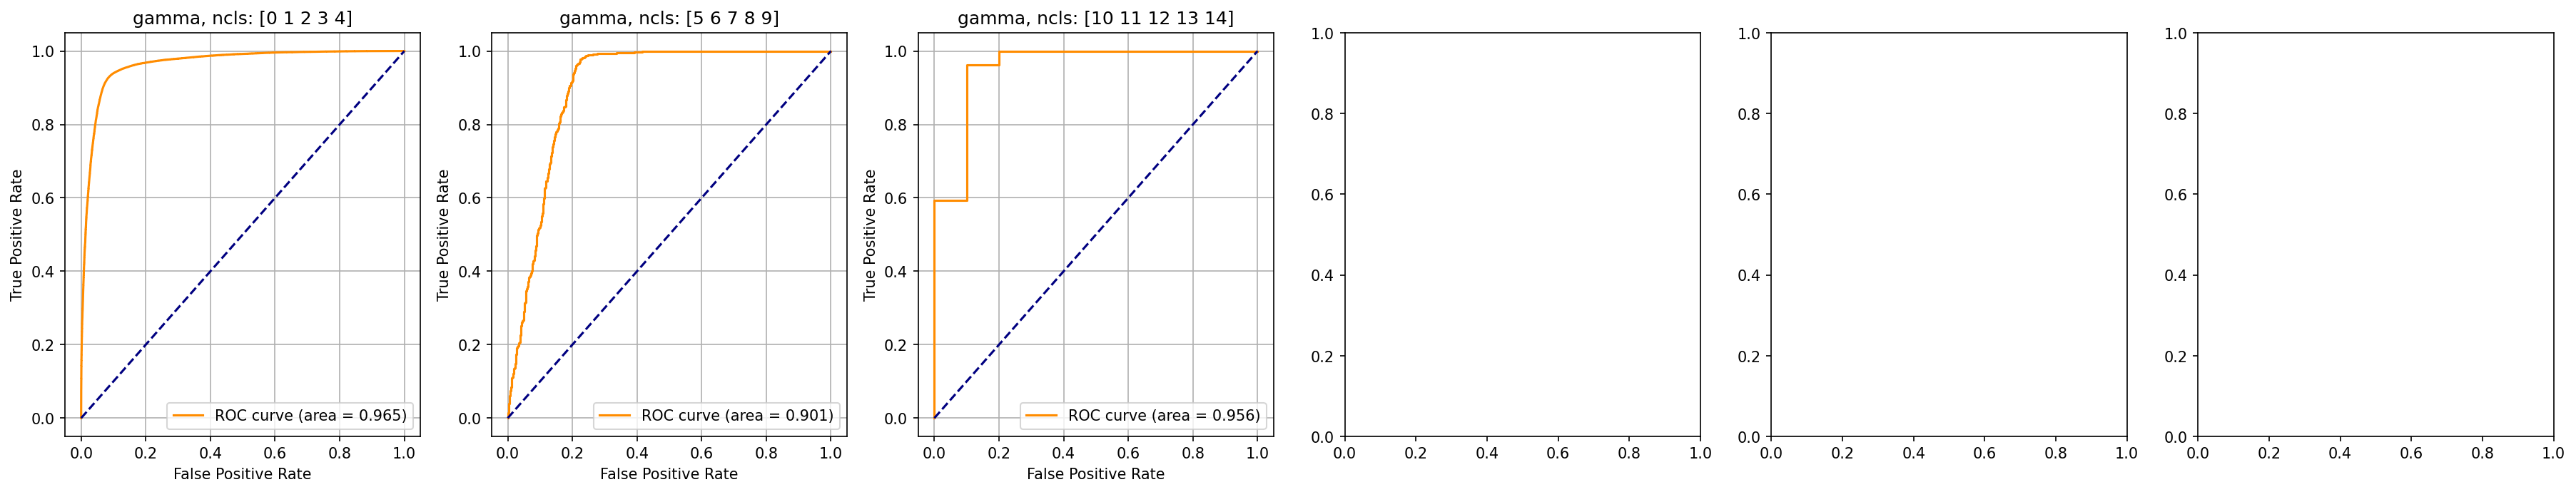

In [171]:
fig, axis = plt.subplots(1, 6, figsize=(30, 5))
for i, condition in enumerate(ncls[:-1]): 
    plot_roc(df_gamma, df_jet, name='gamma', ax=axis[i], condition=condition)
#fig.savefig(data_path +"roc_ncls_ele.png")
#fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/training_33/roc_ncls_ele.png")

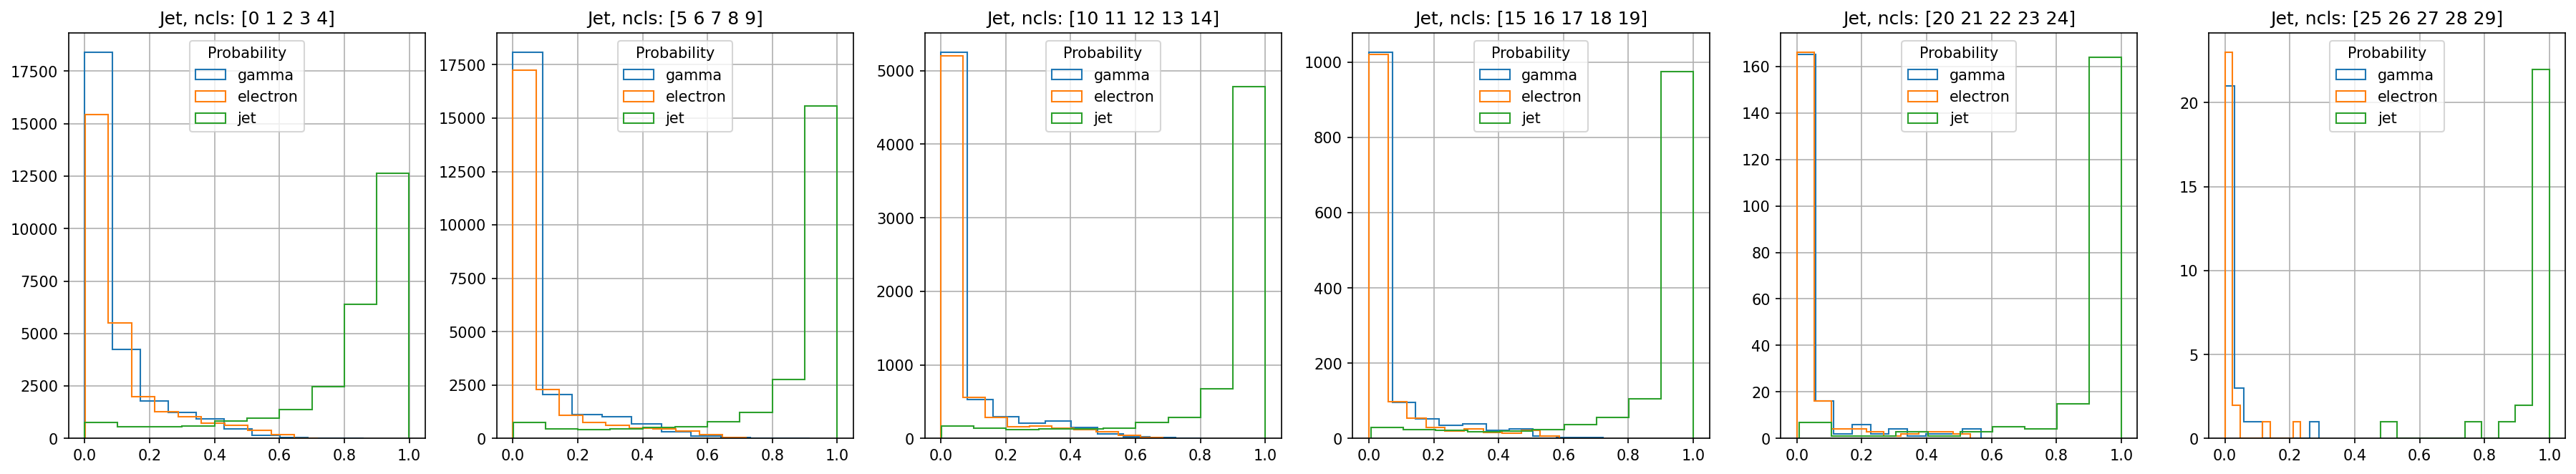

In [163]:
fig, axis = plt.subplots(1, 6, figsize=(30, 5))
for i, condition in enumerate(ncls): 
    plot_probability(df_jet, name='Jet', ax=axis[i], condition=condition)
fig.savefig(data_path +"prob_distr_ncls_jet.png")
fig.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/evaluation/training_33/prob_distr_ncls_jet.png")

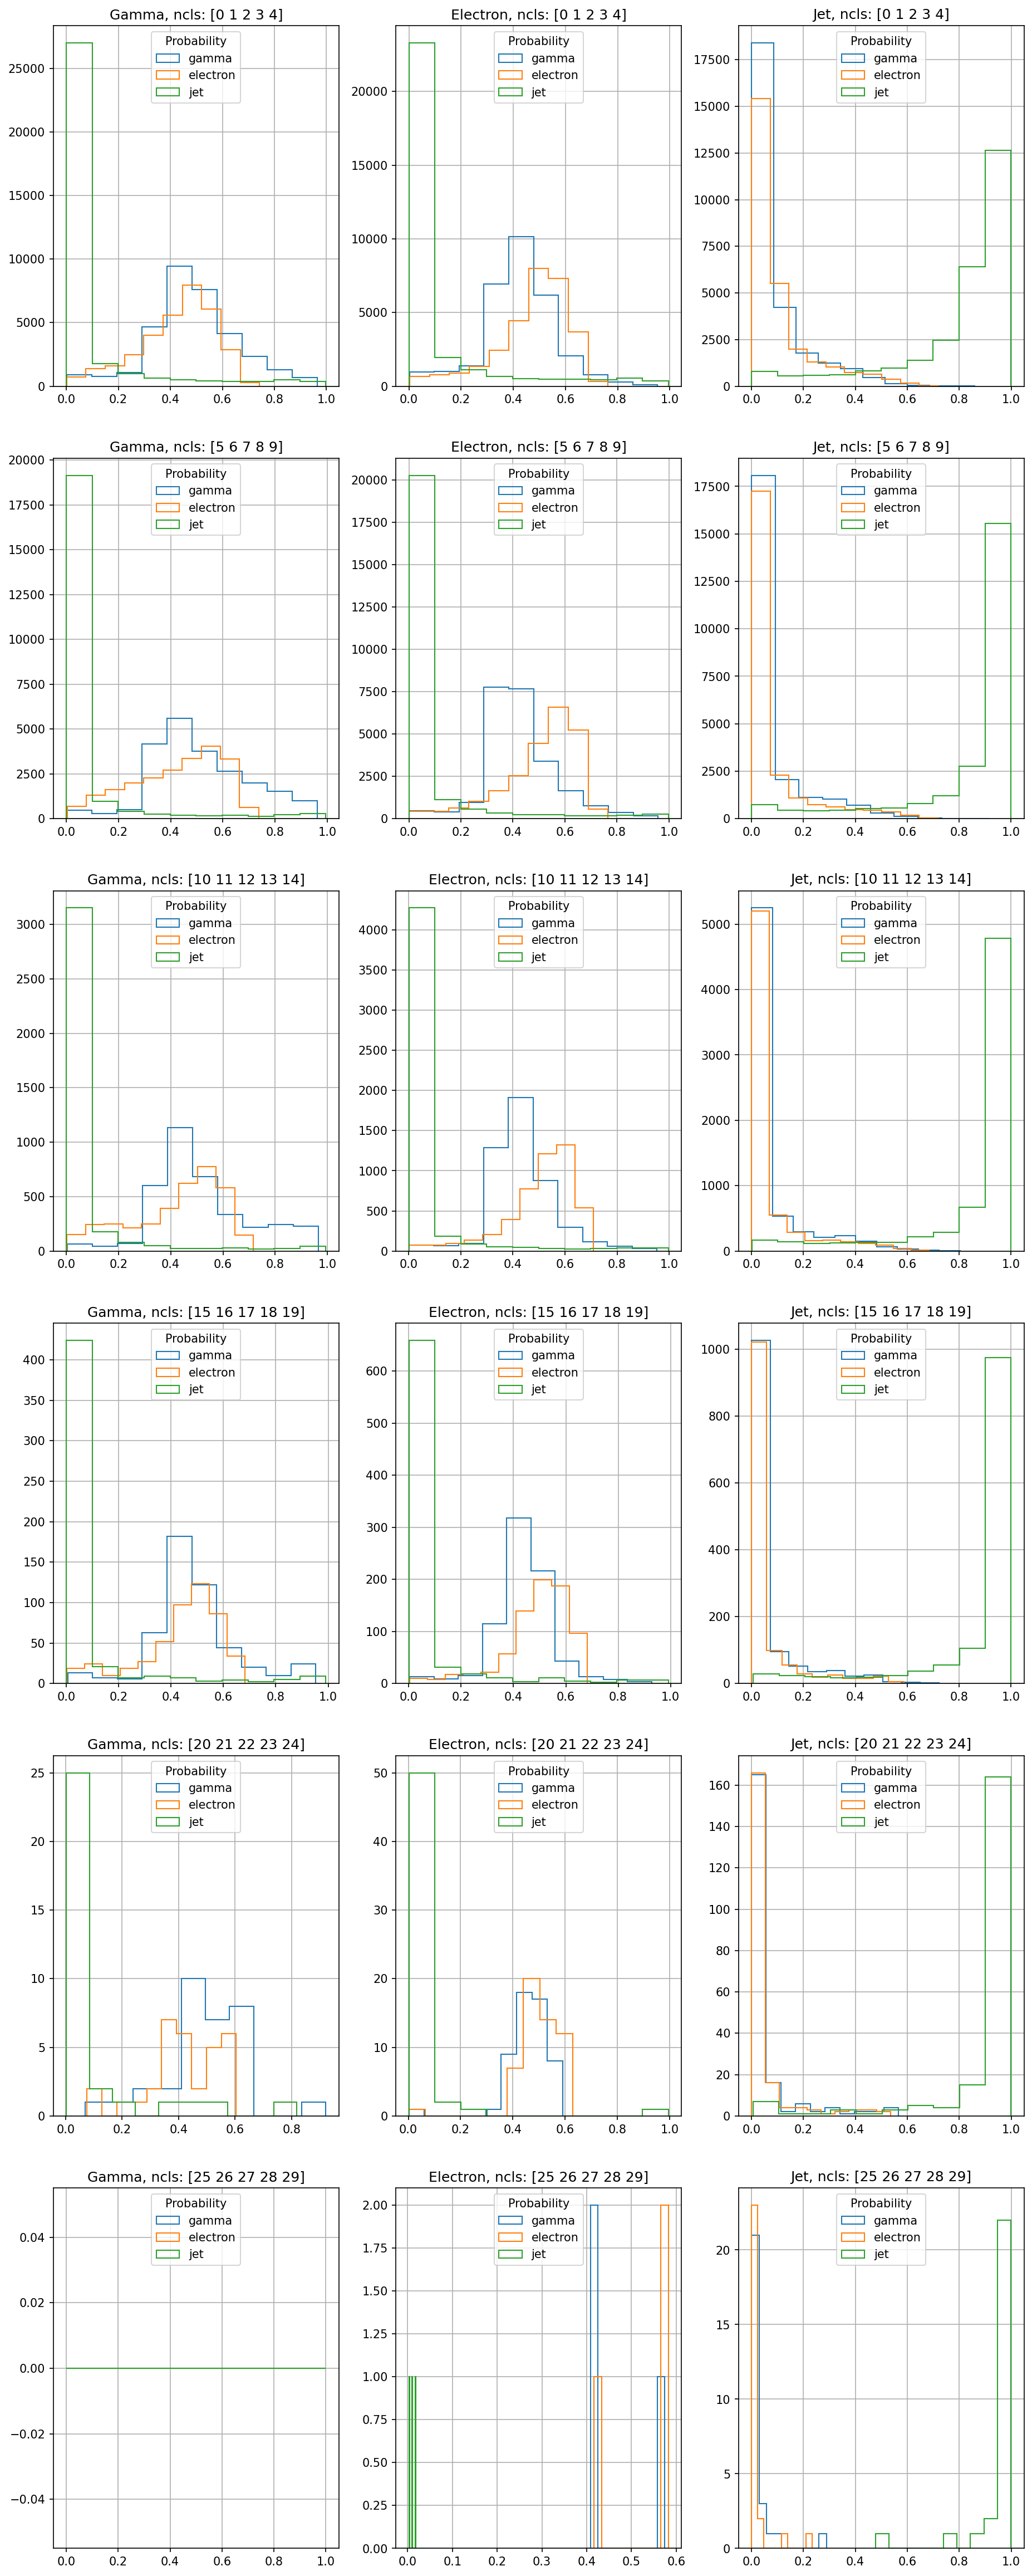

In [126]:
fig, axis = plt.subplots(6, 3, figsize=(15,40))
for i, condition in enumerate(ncls): 
    plot_probability(df_gamma, name='Gamma', ax=axis[i,0], condition=condition)
    plot_probability(df_ele, name='Electron', ax=axis[i,1], condition=condition)
    plot_probability(df_jet, name='Jet', ax=axis[i,2], condition=condition)